# Machine Learning for disease diagnosis using omics data

## Discussion Agenda:


### 2. Items pending - haven't yet had time to complete but hope to complete:
    - Logistic regression
        - Calculation of Youden's statistic as a score for logistic regression model
        - Optimising the threshold to define the classes, for example based on maximising Youden's J statistic, balancing sensitivity and selectivity. Currently threshold set at the default probability of 0.5
    - XGBoost - updating the model to score based on out of bag metrics, and selecting a set number of features
    - Random Forest - test using Recursive Feature Elimination on the Random Forest to reduce the number of features used in the model
    - Logistic regression - optimising the threshold for predicting the classes, based on maximising Youden's J Statistic

- Try MRMR instead of just mutual information for the pre-selection of the features in SVM - https://towardsdatascience.com/mrmr-explained-exactly-how-you-wished-someone-explained-to-you-9cf4ed27458b

- SVM - try alternative to Recursive feature elimination use sequential feature selection algorithm, again with a backward search, but using BIC probabalistic methods to score each model to determine the optimum balance of number of features and performance.

- Read why Random Forest is an embedded feature selection method. Apply Recursive feature elimination to the Random Forest model to select only 30 best features

- Additional Hyper parameter tuning and optimisation of Random Forest and XGBoost

- SVM - try alternative to Recursive feature elimination, where features are eliminated based on coefiients, and use a different function - sequential feature selection, again with a backward search, but using BIC probabalistic methods to score each model to determine the optimum balance of number of features and performance. Would do without cross validation, and just score on the train set.
- RF  - using select from model - https://medium.com/analytics-vidhya/feature-selection-embedded-methods-a7940036973f
- Determine whether calibration required before ROC plot for SVM / RF / XGBoost
- Clean & Integrate clinical data - requires some pre-processing
- Additional Hyper parameter tuning and optimisation of Random Forest and XGBoost
- Experiment with deep learning based feature selection methods from lit search


This file and raw data in github repo here: https://github.com/parkyed/sepsis_ml_omics_msc


### 3. Summary Results (08/09/21)

a) using 9 iterations of the train/test split, with all features


| Model                                                     | Recall    | Precision| AUC  | Youden's J |
| :-                                                        | :-:       | :-:      |:-:   | :-:        |
| Logistic Reg - L1 reg, optimising accuracy (336 feat.)    | 0.94      | 0.92     | 0.98 | 0.xx       |
| Logistic Reg - L1 reg, optimising features (19 feat.)     | 0.94      | 0.94     | 0.99 | 0.xx       |
| SVM - baysian opt, L1 reg, optimising features (30 feat.) | 0.91      | 0.95     | 0.86 |
| SVM - baysian opt, L2 reg, RFE (30 feat.)                 | 0.94      | 0.95     | 0.97 |
| Random Forest, cross validated on accuracy (250 feat.)    | 0.92      | 0.93     | 0.99 |
| Random Forest, scored on OOB   (1,200 feat.)              | 0.93      | 0.95     | 0.98 |
| XGBoost                                                   | 0.xx      | 0.xx     | 0.xx |


b) using 9 iterations of the train/test split, excluding patient Inf_075, the suspected viral sepsis case


| Model                                                     | Recall    | Precision| AUC  |Youden's J |
| :-                                                        | :-:       | :-:      |:-:   |:-:        |
| Logistic Reg - L1 reg, optimising accuracy (336 featurs)  | 0.99      | 0.94     | 1.00 |0.xx       |
| Logistic Reg - L1 reg, optimising features (19 features)  | 0.98      | 0.95     | 1.00 |0.xx       |
| SVM - baysian opt, L1 reg, optimising features (30 feat.) | 0.94      | 0.91     | 0.97 |
| SVM - baysian opt, L2 reg, RFE (30 feat.)                 | 0.95      | 0.99     | 1.00 |
| Random Forest, cross validated on accuracy (250 feat.)    | 0.97      | 0.93     | 0.99 |
| Random Forest, scored on OOB   (1,200 feat.)              | 0.97      | 0.98     | 0.99 |
| XGBoost                                                   | 0.xx      | 0.xx     | 0.xx |

### 4. Selected Features (genes) across three top performing models

1. Logistic regression, L1 regularised, optimising for 30 features
2. SVM, using Recursive Feature Selection to reduce to most important 20 features
3. Random Forest, using OOB scoring

The selected genes from the Logistic Regression model, using L1 regularisation:


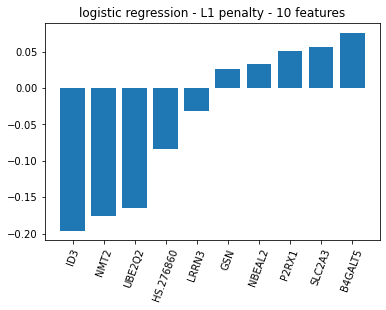

In [275]:
print('The selected genes from the Logistic Regression model, using L1 regularisation:')
plot_genes(selected_gene_lr_nf_final, model='logistic regression - L1 penalty - 10 features')

The 10 selected genes using SVM, Baysian optimisation of C, with RFE to 10 features:


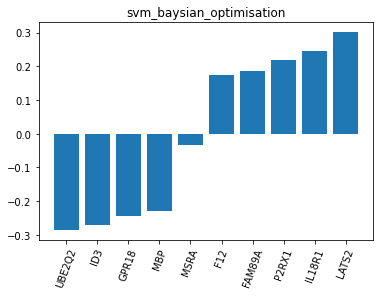

In [330]:
print('The 10 selected genes using SVM, Baysian optimisation of C, with RFE to 10 features:')

plot_genes(selected_gene_svm_b_final, model='svm_baysian_optimisation')

The top 20 selected genes from the Random Forest Classifier, using OOB scoring:


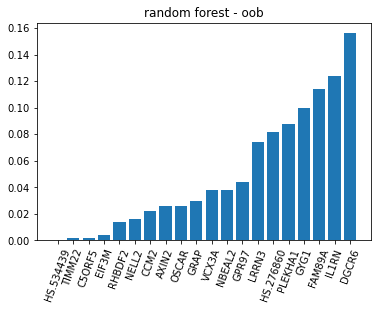

In [466]:
print('The top 20 selected genes from the Random Forest Classifier, using OOB scoring:')

plot_genes(selected_gene_rf_final_oob, model='random forest - oob')

In [352]:
print('The following genes are common to the top selected features in a at least two of the three models above')
print(intersection_list)

The following genes are common to the top selected features in a at least two of the three models above
['B4GALT5', 'ATP6V0E2', 'GSN', 'PDE9A', 'FCGBP', 'NBEAL2', 'C20ORF100', 'NMT2', 'UBE2Q2', 'ID3', 'C20ORF100', 'HS.276860', 'ATP6V0E2', 'NBEAL2', 'ATP6V0E2', 'C20ORF100', 'LRRN3', 'NBEAL2']


### Background / Literature Review (at 16/6/21)

The following papers provide relevant starting points for investigation:

1. [Gene selection for cancer classification using SVMs, Guyon et al. 2001](https://link.springer.com/article/10.1023/A:1012487302797)
2. [Applications of Support Vector Machine (SVM) Learning in Cancer Genomics, Huang et al. 2018](https://pubmed.ncbi.nlm.nih.gov/29275361)
3. [Machine learning and complex biological data, Jackson et al. 2019](https://link.springer.com/article/10.1186/s13059-019-1689-0)
4. [Machine learning algorithm validation with a limited sample size, Vabalas et al. 2019](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0224365)
5. [FsNet: Feature Selection Network on High-dimensional Biological Data, Singh et al. 2020](https://arxiv.org/abs/2001.08322)
6. [Deep Neural Networks for High Dimension, Low Sample Size Data, Liu et al. 2017](https://www.semanticscholar.org/paper/Deep-Neural-Networks-for-High-Dimension%2C-Low-Sample-Liu-Wei/76f755fed7bf1cea8dad35c16bf518eab158c13e?p2df)

# Code:

In [12]:
import pandas as pd
import numpy as np
import os
from scipy import stats
from collections import OrderedDict
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn.model_selection import KFold, RepeatedKFold
import warnings
from joblib import dump, load
from pickle import dump, load
warnings.filterwarnings(action="ignore", message="^internal gelsd")
warnings.filterwarnings(action="ignore", message="Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.")
#np.random.seed(1)


In [4]:
os.getcwd()

'/Users/Ed/Documents/GitHub/sepsis_ml_omics_msc'

### Data Import and Reformatting

In [13]:
# import and check data

raw_data = pd.read_csv('genomic_data.csv')
print('The number of columns is:  '+str(len(raw_data.columns)))
print('The number of row is:  '+str(len(raw_data)))

The number of columns is:  93
The number of row is:  48804


In [14]:
# Eliminate duplicate genes. Testing on various columns, NaN values excluded before looking for duplicates.

dup_column = ['NuID', 'Search_Key', 'ILMN_Gene', 'RefSeq_ID', 'Entrez_Gene_ID', 'Probe_Id']
for column in dup_column:
    data = raw_data.dropna(subset=[column])
    dup_list = []
    for index, value in data.duplicated(subset=[column]).items():
        if value == True:
            dup_list.append(index)
    print(f"# duplicate rows based on {column}:   "+str(len(dup_list)))

# duplicate rows based on NuID:   0
# duplicate rows based on Search_Key:   4671
# duplicate rows based on ILMN_Gene:   11000
# duplicate rows based on RefSeq_ID:   5742
# duplicate rows based on Entrez_Gene_ID:   10897
# duplicate rows based on Probe_Id:   1


In [15]:
# reformat data, drop duplicates, transpose, index on probe_id, drop columns with all NaN, drop Fold change

gene_df = raw_data.iloc[:, 0:29]
df = raw_data.iloc[:, np.r_[14, 29:93]].drop_duplicates(subset=['Probe_Id'])
df = df.transpose()
df = df.rename(columns=df.iloc[0]).drop(df.index[0])
df = df.drop(['Fold change'], axis=0)
df = df.dropna(axis=1, how='all')

labels = []
for item in df.index:
    if 'Con' in item:
        labels.append(0)
    else:
        labels.append(1)
labels = np.asarray(labels)

bool_series_zeros = (df == 0).all(axis=0)

print('Features:  '+str(len(df.columns)))
print('Examples:  '+str(len(df)))
print('Missing values:   '+str(df.isnull().sum().sum()))
print('The number of columns with all zeros is:   '+str(sum(bool_series_zeros)))
df.head()

Features:  48802
Examples:  63
Missing values:   0
The number of columns with all zeros is:   0


,ILMN_2227757,ILMN_1683690,ILMN_1710146,ILMN_1822171,ILMN_1748473,ILMN_1822843,ILMN_1710170,ILMN_1704497,ILMN_1847638,ILMN_1772260,...,ILMN_1712859,ILMN_1747129,ILMN_1813344,ILMN_2292576,ILMN_1793445,ILMN_2065273,ILMN_1800873,ILMN_1666642,ILMN_1908209,ILMN_1670343
Con_001,7.0713,7.0252,7.0713,7.0713,12.8555,7.0395,7.0252,7.0252,6.9692,7.1443,...,6.9278,7.0713,7.6728,7.0545,7.0103,7.0252,7.2258,7.3808,7.2626,6.9828
Con_017,7.0033,7.0436,7.0832,7.1232,12.5604,7.1232,7.0301,7.1486,6.9203,7.1865,...,7.0436,7.0164,8.1798,6.9896,6.9896,7.0963,7.0577,6.9492,7.0164,7.0301
Con_021,7.0907,7.0323,7.097,7.0824,12.5437,7.0583,7.0739,6.9975,6.9975,7.0405,...,7.097,7.0158,7.8981,7.0158,7.1521,7.0655,7.0824,6.9975,7.097,6.9892
Con_022b,7.0327,7.024,7.0419,7.024,12.0483,7.0766,7.0598,7.1015,6.9954,7.0055,...,7.1564,7.167,7.9036,6.9031,7.0598,6.9863,7.1625,7.1378,7.024,7.0327
Con_028,7.0057,6.9538,7.0308,7.0831,12.6549,6.9538,6.9538,7.1371,7.1512,7.264,...,7.0577,7.0057,8.2019,7.0308,7.0702,6.9799,7.0963,7.1512,7.2064,7.0186


In [16]:
# create copy of the data without patient Inf_075

df_no75 = df.drop(['Inf075'], axis=0)

# re-create labels
labels_no75 = []
for item in df.index:
    if item == 'Inf075':
        continue
    if 'Con' in item:
        labels_no75.append(0)
    else:
        labels_no75.append(1)
labels_no75 = np.asarray(labels_no75)
len(labels_no75)

# check it is correct
#list(zip(df_no75.index, labels_no75))
df_no75.shape

(62, 48802)

### Pre-Processing

1. **Standardisation** - Data standardised (i.e. z-scored) for the following reasons:
- L1 regularisation penalties in logistic regressions assumes data centred at zero and on the same scale
- Distance based ML models such as SVM require and assume standardised data, otherwise variables on larger scales disproportionally impact the model
- Am using the output coeffiecients from logistic regression as a crude measure of feature importance, and so in order to compare coefficients as a measure of relative importance, variables must be standardised

background - https://towardsdatascience.com/normalization-vs-standardization-quantitative-analysis-a91e8a79cebf

2. **Train, test, split:** 66% train / 33% test

Ref: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html


In [17]:
# standardise by imputing NaN values and using standard scale - z-scoring
# note - given imputer not necessary, could move standard scaler into the pipeline for each model

def standardise(examples):
    scaler = StandardScaler()
    examples_scaled = scaler.fit_transform(examples)
    return examples_scaled

X_df = standardise(df)
X_df = pd.DataFrame(X_df, columns=df.columns, index=df.index)
print(X_df.shape)

# dataset excluding patient 75
X_df_no75 = standardise(df_no75)
X_df_no75 = pd.DataFrame(X_df_no75, columns=df_no75.columns, index=df_no75.index)
print(X_df_no75.shape)

# Reduced dataset for code testing
X_df_red = X_df.iloc[:, 0:200]
print(X_df_red.shape)

(63, 48802)
(62, 48802)
(63, 200)


### Functions for model analysis

In [295]:
def score_model(y_pred_classes, y_pred_probabilities, y_true_classes):
    accuracy = round(accuracy_score(y_true_classes, y_pred_classes),2)
    recall = round(recall_score(y_true_classes, y_pred_classes),2)
    tn, fp, fn, tp = confusion_matrix(y_true_classes, y_pred_classes).ravel()
    specificity = round((tn / (tn+fp)),2)
    precision = round(precision_score(y_true_classes, y_pred_classes),2)
    auc = round(roc_auc_score(y_true_classes, y_pred_probabilities[:, 1]),2)
    return accuracy, recall, specificity, precision, auc

def score_model_no_auc(y_pred_classes, y_true_classes):
    accuracy = round(accuracy_score(y_true_classes, y_pred_classes),2)
    recall = round(recall_score(y_true_classes, y_pred_classes),2)
    tn, fp, fn, tp = confusion_matrix(y_true_classes, y_pred_classes).ravel()
    specificity = round((tn / (tn+fp)),2)
    precision = round(precision_score(y_true_classes, y_pred_classes),2) 
    return accuracy, recall, specificity, precision

def mis_class_points(X_test, y_pred_classes, y_true_classes):
    mis_classified = {}
    for row_index, (examples, prediction, label) in enumerate(zip (X_test, y_pred_classes, y_true_classes)):
        if prediction == label:
            continue
        if prediction == 0 and label == 1:
            mis_classified[X_test.iloc[[row_index]].index[0]] = 'fn'
        elif prediction == 1 and label == 0:
            mis_classified[X_test.iloc[[row_index]].index[0]] = 'fp'
    return mis_classified  

def plot_auc_cm(X_test, y_pred_classes, y_pred_probabilities, y_true_classes):
    build_roc_auc(y_pred_probabilities, y_true_classes)
    cm = confusion_matrix(y_true_classes, y_pred_classes)
    cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    cm_disp.plot(colorbar=False)

In [19]:
# function for building the ROC curve
# Code credit: https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/

import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc, roc_auc_score
from scipy import interp

def build_roc_auc(y_preds, y_test): #model, X_train, X_test, y_train, y_test):
    '''
    INPUT:
    model - an sklearn instantiated model
    X_train - the training data
    y_train - the training response values
    X_test - the test data
    y_test - the test response values
    
    OUTPUT:
    auc - returns auc as a float
    prints the roc curve
    '''
    
    #y_preds = model.fit(X_train, y_train).predict_proba(X_test)
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(y_test)):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_preds[:, 1])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_preds[:, 1].ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    plt.plot(fpr[2], tpr[2], color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc[2])
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic plot')
    plt.show()
    
    return roc_auc_score(y_test, np.round(y_preds[:, 1]))

### Functions to extract genes from final models and plot them

In [20]:
# select features and match to common gene names for models that output coefficients

from matplotlib import pyplot

# identify genes where model outputs coefficients

def identify_genes_from_coefs(selected_features, dataset, gene_df):
    selected_gene_list = list(zip(dataset.columns, selected_features))

    selected_gene_codes = []
    selected_gene_coefficients = []
    for gene in selected_gene_list:
        if gene[1] != 0:
            selected_gene_codes.append(gene[0])
            selected_gene_coefficients.append(gene[1])

    # identify common gene codes
    selected_gene_df = gene_df[gene_df['Probe_Id'].isin(selected_gene_codes)].iloc[:, np.r_[14, 5]]
    selected_gene_codes_common = list(selected_gene_df.iloc[:,1])

    # zip features importances with common names

    selected_gene_final = list(zip(selected_gene_codes_common, selected_gene_coefficients))
    selected_gene_final = sorted(selected_gene_final, key = lambda x: x[1])
    
    return selected_gene_final

# function to extract genes using feature importances data

def select_genes_fi(selected_features, dataset, gene_df):

    selected_gene_list = list(zip(dataset.columns, selected_features))

    selected_gene_codes = []
    selected_gene_coefficients = []
    for gene in selected_gene_list:
        if gene[1] > 0:
            selected_gene_codes.append(gene[0])
            selected_gene_coefficients.append(gene[1])

    # identify common gene codes
    selected_gene_df = gene_df[gene_df['Probe_Id'].isin(selected_gene_codes)].iloc[:, np.r_[14, 5]]
    selected_gene_codes_common = list(selected_gene_df.iloc[:,1])

    # zip features importances with common names

    selected_gene_final = list(zip(selected_gene_codes_common, selected_gene_coefficients))
    selected_gene_final = sorted(selected_gene_final, key = lambda x: x[1])
    
    return selected_gene_final

# plot_of genes vs. coefficients

def plot_genes(features_sorted, model):
    pyplot.bar(range(len(features_sorted)), [val[1] for val in features_sorted])
    pyplot.xticks(range(len(features_sorted)), [val[0] for val in features_sorted])
    plt.title(model)
    pyplot.xticks(rotation=70)

### Classifier 1: Logistic Regression

- L1 regularised logistic regression. L1 used given we know that a large number of feature are irrelevant, hence L1 / Lasso regularisation acts as form of feature selection. L1 required the liblinear solver.
- L1 - Lasso - regularisation is an embedded feature selection method, therefore no additional feature selection implemented.
- Discussion of FS methods - https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/
- Nested cross validation used given the low sample size, and potential high variance in the output data
- code credit: https://machinelearningmastery.com/nested-cross-validation-for-machine-learning-with-python/
- Source / ref: avoiding common pitfalls in machine learning omic data science paper
- Performed with Leave One Out cross-validation - i.e. n folds - on the regularisation parameter C. Given small samples size, LOO provides the least biased model, the most accurate estimate of model performance, as every training example is used as a validation set.
https://machinelearningmastery.com/loocv-for-evaluating-machine-learning-algorithms/
- Had previously tried 5-fold cross validation - but loo improved the performance. Mention, and explain why.


### Hyper-parameter optimisation - Baysian optimisation with Gaussian Processes

- The grid search of the logistic regression hyper parameter C is time consuming and slow, potentially testing a large number of useless and poorly performing parameters. May also result in high variance of the outcome over multiple train/ test splits (reference literature)
- Using Baysian optimisation with Gaussian Processes as a more computationally efficient, and more rigerous process to determine the optimum value of C.
- Manually coded the inner cross validation loop - to be able to store the predictions for each fold, and then calculate a score for the value of C, using the set of y-hat and y-val across all 42 folds. Built in CV assumes larger samples sizes with say 5 fold, and calculates a score on each fold and averages - doesn't allow to do recall / precision given could have zero demoniators. 
- Logistic regression with lasso - an embedded feature selection reduces features from 48,000 down to 200-300 features. Good, but ideally want a model that performs equally well, but is able to identify the best 5-10 feature - i.e. stronger penalties in place for useless features. However want to use an approach that involves fitting models, and not filtering based on linear relationships with the output variable. E.g. not Kbest or filter methods, given problems of co-linearity (see slide deck). Therefore looking at SVM-RFE, and regularised tree based models. And SVM with SFS using BIC???
- code credit - https://machinelearningmastery.com/scikit-optimize-for-hyperparameter-tuning-in-machine-learning/
- code credit - https://scikit-optimize.github.io/stable/modules/generated/skopt.utils.use_named_args.html
- code credit - https://towardsdatascience.com/optimizing-hyperparameters-the-right-way-3c9cafc279cc
- ref: https://scikit-optimize.github.io/stable/modules/generated/skopt.optimizer.gp_minimize.html#skopt.optimizer.gp_minimize


### i. Optimise for performance, regardless of number of features

In [229]:
from sklearn.model_selection import RepeatedKFold, LeaveOneOut
from sklearn.linear_model import LogisticRegression
from skopt.space import Real
from skopt.utils import use_named_args
from skopt import gp_minimize
from skopt.plots import plot_convergence, plot_evaluations
from math import log
from matplotlib import pyplot as plt
import pickle
import warnings
warnings.filterwarnings("ignore", message="The objective has been evaluated at this point before")

def nested_cv_lr(df, labels, n_repeats):

    # configure the cross-validation procedure
    cv_outer = RepeatedKFold(n_splits=3, n_repeats=n_repeats)

    # lists to collect scores from each outer fold
    scores_list = []
    best_parameters_list = []
    mis_classified_list = []

    # create inner loop for hyper parameter optimisation
    for train_ix, test_ix in cv_outer.split(df):

        # split data
        X_train, X_test = df.iloc[train_ix, :], df.iloc[test_ix, :]
        y_train, y_test = labels[train_ix], labels[test_ix]

        model, best_parameter = train_lr_baysian(X_train, y_train)

        # predict on the test set and store the selected features
        y_pred = model.predict(X_test)
        y_pred_probab = model.predict_proba(X_test)
        
        # evaluate the model
        scores = score_model(y_pred, y_pred_probab, y_test)
        mis_classified = mis_class_points(X_test, y_pred, y_test)

        # add scores for this train test split to lists collecting scores for all splits
        scores_list.append(scores)
        best_parameters_list.append(best_parameter)
        mis_classified_list.append(mis_classified)

    return scores_list, best_parameters_list, mis_classified_list

def train_lr_baysian(X_train, y_train):
    # define cross validation approach
    cv_inner = LeaveOneOut()

    # define hyper paramaeter search space
    hyper_p_c = Real(low=1e-6, high=1000.0, prior='log-uniform', name='C')
    search_space_lr = [hyper_p_c]

    # define the objective function to optimise over the hyper-parameter search space. Here we want to minimise 1- the 
    # accuracy score - balancing recall and precision in the model.
    @use_named_args(search_space_lr)
    def evaluate_model(**params):
        cv_inner = LeaveOneOut()
        y_val_classes = []
        y_val_predictions = []
        for train_index, val_index in cv_inner.split(X_train):

            X_train_inner, X_val = X_train.iloc[train_index, :], X_train.iloc[val_index, :]
            y_train_inner, y_val = y_train[train_index], y_train[val_index]         
       
            # define the model
            model = LogisticRegression(penalty='l1', solver="liblinear")
            model.set_params(**params)
            model.fit(X_train_inner, y_train_inner)

            y_val_pred = model.predict(X_val)
            y_val_classes.append(y_val)
            y_val_predictions.append(y_val_pred)
            
        score = accuracy_score(y_val_classes, y_val_predictions)
        return 1.0 - score

    # perform optimization
    result = gp_minimize(evaluate_model, search_space_lr, acq_func="EI", x0=[1.0], n_initial_points=20, n_calls=30)

    # save the best performing value of hyper parameter C
    best_parameter = result.x
    print('Best Parameters: %s' % (result.x))
    print('Best Score: %.3f' % (1.0 - result.fun))
    plot_convergence(result)
    plt.savefig("lr_best_features.jpeg")
    

    # retrain the model with fixed value of C
    model = LogisticRegression(C=best_parameter[0],
                                  penalty='l1',
                                  solver="liblinear")
    model.fit(X_train, y_train)

    return model, best_parameter

Best Parameters: [279.4608947787446]
Best Score: 0.976
Best Parameters: [135.65863657622444]
Best Score: 0.976
Best Parameters: [3.0001177043781375]
Best Score: 0.952
The results for logistic regression test examples:
[(0.95, 1.0, 0.92, 0.9, 0.99), (0.86, 0.83, 0.89, 0.91, 0.95), (0.9, 1.0, 0.86, 0.78, 0.94)]
[[279.4608947787446], [135.65863657622444], [3.0001177043781375]]
[0.90333333 0.94333333 0.89       0.86333333 0.96      ]
[{'Con_079': 'fp'}, {'Con_087a': 'fp', 'Inf075': 'fn', 'Inf_149': 'fn'}, {'Con_096a': 'fp', 'Con_165a': 'fp'}]


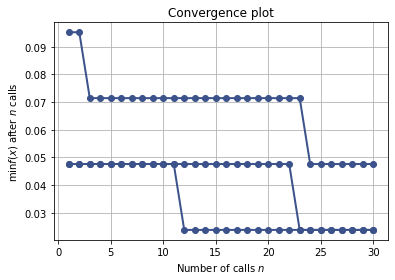

In [230]:
# run nested cross validation on test data set
scores_lr_red, best_parameters_lr_red, mis_classified_lr_red = nested_cv_lr(X_df_red, labels, 1)

# print results
print('The results for logistic regression test examples:')
print(scores_lr_red)
print(best_parameters_lr_red)
print(np.mean(np.asarray(scores_lr_red), axis=0))
print(mis_classified_lr_red)

Best Parameters: [1.0]
Best Score: 0.952
Best Parameters: [164.42565896347222]
Best Score: 0.952
Best Parameters: [26.627334661825195]
Best Score: 0.976
Best Parameters: [1.0]
Best Score: 0.952
Best Parameters: [31.957829198513135]
Best Score: 0.976
Best Parameters: [515.5174932024719]
Best Score: 0.976
Best Parameters: [1.0]
Best Score: 0.952
Best Parameters: [0.33680208989799]
Best Score: 1.000
Best Parameters: [5.976801711174215]
Best Score: 0.976
Best Parameters: [1.0]
Best Score: 1.000
Best Parameters: [17.59879602731302]
Best Score: 0.976
Best Parameters: [1.0]
Best Score: 0.976
Best Parameters: [1.0]
Best Score: 1.000
Best Parameters: [1.0]
Best Score: 0.976
Best Parameters: [1.0]
Best Score: 0.976
Best Parameters: [1.0]
Best Score: 1.000
Best Parameters: [259.7190102001664]
Best Score: 1.000
Best Parameters: [1.0]
Best Score: 0.976


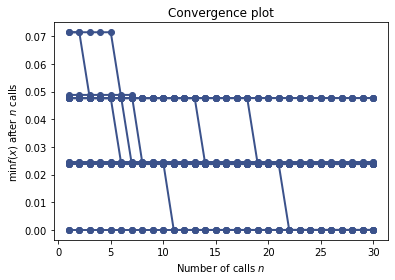

In [278]:
# run optimisations on full dataset

# run nested cross validation on full data set
scores_lr, best_parameters_lr, mis_classified_lr = nested_cv_lr(X_df,  labels, 3)

# run nested cross validation without patient 75
scores_lr_no75, best_parameters_lr_no75, mis_classified_lr_no75 = nested_cv_lr(X_df_no75, labels_no75, 3)


In [279]:
# Print LR results

#print('The results for logistic regression with all 63 examples:')
print(scores_lr)
print(best_parameters_lr)
print(np.mean(np.asarray(scores_lr), axis=0))
print(mis_classified_lr)

#print('The results for logistic regression without patient 75:')
print(scores_lr_no75)
print(best_parameters_lr_no75)
print(np.mean(np.asarray(scores_lr_no75), axis=0))
print(mis_classified_lr_no75)

# with open('lr_results.pkl', 'rb') as f:
#    a, b, c, d, e, f, g, h = pickle.load(f)

[(0.95, 1.0, 0.93, 0.88, 1.0), (0.86, 0.89, 0.83, 0.8, 0.94), (0.95, 0.92, 1.0, 1.0, 0.97), (0.95, 1.0, 0.89, 0.92, 1.0), (0.9, 1.0, 0.86, 0.78, 0.98), (0.95, 0.89, 1.0, 1.0, 0.99), (0.9, 1.0, 0.78, 0.86, 1.0), (0.9, 0.88, 0.92, 0.88, 0.99), (0.95, 0.88, 1.0, 1.0, 1.0)]
[[1.0], [164.42565896347222], [26.627334661825195], [1.0], [31.957829198513135], [515.5174932024719], [1.0], [0.33680208989799], [5.976801711174215]]
[0.92333333 0.94       0.91222222 0.90222222 0.98555556]
[{'Con_040': 'fp'}, {'Con_165a': 'fp', 'Con_181a': 'fp', 'Inf_149': 'fn'}, {'Inf075': 'fn'}, {'Con_165a': 'fp'}, {'Con_087a': 'fp', 'Con_206': 'fp'}, {'Inf075': 'fn'}, {'Con_087a': 'fp', 'Con_206': 'fp'}, {'Con_165a': 'fp', 'Inf075': 'fn'}, {'Inf_149': 'fn'}]
[(1.0, 1.0, 1.0, 1.0, 1.0), (1.0, 1.0, 1.0, 1.0, 1.0), (1.0, 1.0, 1.0, 1.0, 1.0), (1.0, 1.0, 1.0, 1.0, 1.0), (1.0, 1.0, 1.0, 1.0, 1.0), (1.0, 1.0, 1.0, 1.0, 1.0), (0.95, 1.0, 0.92, 0.9, 0.99), (0.95, 1.0, 0.92, 0.89, 1.0), (1.0, 1.0, 1.0, 1.0, 1.0)]
[[1.0], [17.

In [92]:
#with open('lr_results.pkl', 'rb') as f:
#    scores_lr, best_parameters_lr, mis_classified_lr, selected_features_lr, scores_lr_no75, best_parameters_lr_no75, mis_classified_lr_no75 = pickle.load(f)

In [280]:
# create dataframe of results including patient 75
lr_results_df_all_inc75 = lr_results_df(scores_lr, best_parameters_lr, mis_classified_lr)
lr_results_df_all_inc75

,Best C,Accuracy,Recall,Specificity,Precision,AUC,False Positives,False Negatives
1,1.0,0.95,1.00,0.93,0.88,1.00,[Con_040],[]
2,164.43,0.86,0.89,0.83,0.80,0.94,"[Con_165a, Con_181a]",[Inf_149]
3,26.63,0.95,0.92,1.00,1.00,0.97,[],[Inf075]
4,1.0,0.95,1.00,0.89,0.92,1.00,[Con_165a],[]
5,31.96,0.90,1.00,0.86,0.78,0.98,"[Con_087a, Con_206]",[]
6,515.52,0.95,0.89,1.00,1.00,0.99,[],[Inf075]
7,1.0,0.90,1.00,0.78,0.86,1.00,"[Con_087a, Con_206]",[]
8,0.34,0.90,0.88,0.92,0.88,0.99,[Con_165a],[Inf075]
9,5.98,0.95,0.88,1.00,1.00,1.00,[],[Inf_149]
Total,n/a,0.92,0.94,0.91,0.90,0.99,n/a,n/a


In [281]:
# create dataframe of results without patient 75
lr_results_df_all_no75 = lr_results_df(scores_lr_no75, best_parameters_lr_no75, mis_classified_lr_no75)
lr_results_df_all_no75

,Best C,Accuracy,Recall,Specificity,Precision,AUC,False Positives,False Negatives
1,1.0,1.00,1.0,1.00,1.00,1.00,[],[]
2,17.6,1.00,1.0,1.00,1.00,1.00,[],[]
3,1.0,1.00,1.0,1.00,1.00,1.00,[],[]
4,1.0,1.00,1.0,1.00,1.00,1.00,[],[]
5,1.0,1.00,1.0,1.00,1.00,1.00,[],[]
6,1.0,1.00,1.0,1.00,1.00,1.00,[],[]
7,1.0,0.95,1.0,0.92,0.90,0.99,[Con_165a],[]
8,259.72,0.95,1.0,0.92,0.89,1.00,[Con_206],[]
9,1.0,1.00,1.0,1.00,1.00,1.00,[],[]
Total,n/a,0.99,1.0,0.98,0.98,1.00,n/a,n/a


In [283]:
# produce the LaTex code:

with open('lr_results_table_all_inc75.tex','w') as tf:
    tf.write(lr_results_df_all_inc75.to_latex())
    
with open('lr_results_table_all_no75.tex','w') as tf:
    tf.write(lr_results_df_all_no75.to_latex())

Best Parameters: [1.0]
Best Score: 0.968


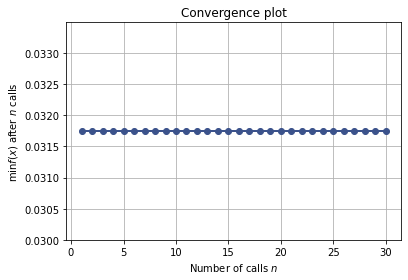

In [354]:
# train final model and determine features

# re-training the final model on the full dataset to identify the selected features    
# extract coefficients based on model type

final_lr, best_param = train_lr_baysian(X_df, labels)

In [355]:
# select features and match to common gene names

selected_features_lr = final_lr.coef_[0]
selected_gene_lr_final = identify_genes_from_coefs(selected_features_lr, X_df, gene_df)


The number of selected genes is:  89


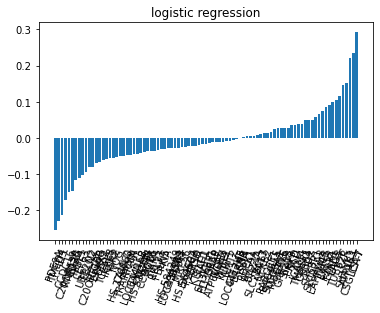

In [356]:
print('The number of selected genes is:  '+str(len(selected_gene_lr_final)))
plot_genes(selected_gene_lr_final, model='logistic regression')

In [921]:
# saving down results of the model

with open('lr_results.pkl', 'wb') as f:
    pickle.dump([scores_lr, best_parameters_lr, mis_classified_lr, selected_features_lr,
                scores_lr_no75, best_parameters_lr_no75, mis_classified_lr_no75], f)

In [971]:
with open('lr_final_model.pkl', 'wb') as f:
    pickle.dump([final_lr, best_param], f)

In [89]:
#with open('lr_results.pkl', 'rb') as f:
 #   scores_lr, best_parameters_lr, mis_classified_lr, selected_features_lr, scores_lr_no75, best_parameters_lr_no75, mis_classified_lr_no75 = pickle.load(f)

### ii. solving for fixed number of features

In [266]:
# alternative optimisation function to solve for a fixed number of features

def nested_cv_lr_nf(df, labels, n_repeats, n_features):

    # configure the cross-validation procedure
    cv_outer = RepeatedKFold(n_splits=3, n_repeats=n_repeats)

    # lists to collect scores from each outer fold
    scores_list = []
    best_parameters_list = []
    mis_classified_list = []
    predictions_list = []

    # create inner loop for hyper parameter optimisation
    for train_ix, test_ix in cv_outer.split(df):

        # split data
        X_train, X_test = df.iloc[train_ix, :], df.iloc[test_ix, :]
        y_train, y_test = labels[train_ix], labels[test_ix]

        model, best_parameter = train_lr_baysian_nf(X_train, y_train, n_features)

        # predict on the test set and store the selected features
        y_pred = model.predict(X_test)
        y_pred_probab = model.predict_proba(X_test)
  
        # evaluate the model
        scores = score_model(y_pred, y_pred_probab, y_test)
        mis_classified = mis_class_points(X_test, y_pred, y_test)

        # add scores for this train test split to lists collecting scores for all splits
        scores_list.append(scores)
        best_parameters_list.append(best_parameter)
        mis_classified_list.append(mis_classified)
        predictions_list.append((y_pred, y_pred_probab, y_test))
   
    return scores_list, best_parameters_list, mis_classified_list, predictions_list

# could count the coefficients at each round as well

def train_lr_baysian_nf(X_train, y_train, n_features):

    # define hyper paramaeter search space
    hyper_p_c = Real(low=1e-6, high=1000.0, prior='log-uniform', name='C')
    search_space_lr = [hyper_p_c]
    target_features = n_features

    # define the objective function to optimise over the hyper-parameter search space.
    @use_named_args(search_space_lr)
    def evaluate_model(**params):
        # define the model
        model = LogisticRegression(penalty='l1', solver="liblinear")
        model.set_params(**params)
        model.fit(X_train, y_train)

        n_nonzero = np.sum(model.coef_ != 0)
        return (target_features-n_nonzero)**2

    # perform optimization
    result = gp_minimize(evaluate_model, search_space_lr, acq_func="EI", x0=[1.0], n_initial_points=20, n_calls=30)

    # save the best performing value of hyper parameter C
    best_parameter = result.x
    print('Best Parameters: %s' % (result.x))
    plot_convergence(result)
    plt.savefig("lr_best_features_nf.jpeg")

    # retrain the model with fixed value of C
    model = LogisticRegression(C=best_parameter[0],
                                  penalty='l1',
                                  solver="liblinear")
    model.fit(X_train, y_train)

    return model, best_parameter


Best Parameters: [22.85210154661635]
Best Parameters: [82.50631148095071]
Best Parameters: [236.94968998602866]
[(1.0, 1.0, 1.0, 1.0, 1.0), (0.95, 0.89, 1.0, 1.0, 1.0), (0.76, 0.78, 0.75, 0.7, 0.88)]
[[22.85210154661635], [82.50631148095071], [236.94968998602866]]
[0.90333333 0.89       0.91666667 0.9        0.96      ]
[{}, {'Inf_114': 'fn'}, {'Con_087a': 'fp', 'Con_165a': 'fp', 'Con_206': 'fp', 'Inf075': 'fn', 'Inf_119': 'fn'}]


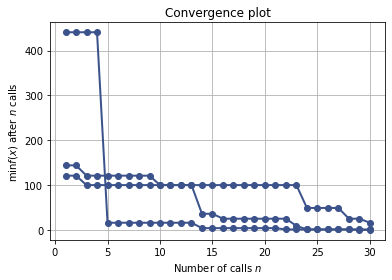

In [197]:
# run nested cross validation on test data set
scores_lr_nf_test, best_parameters_lr_nf_test, mis_classified_lr_nf_test, predictions_list_lr_nf_test = nested_cv_lr_nf(X_df_red, labels, 1, 30)

#print('The results for logistic regression test examples:')
print(scores_lr_nf_test)
print(best_parameters_lr_nf_test)
print(np.mean(np.asarray(scores_lr_nf_test), axis=0))
print(mis_classified_lr_nf_test)
#print(predictions_list_lr_nf_test)

results for all examples:
Best Parameters: [0.36419142683601513]
Best Parameters: [0.13350334367085442]
Best Parameters: [0.22845182219402574]
Best Parameters: [0.21847143468221883]
Best Parameters: [0.21522365073142738]
Best Parameters: [0.32280233033090033]
Best Parameters: [0.23503157275378297]
Best Parameters: [0.41394222057040864]
Best Parameters: [0.30969499222690094]

results for examples excluding patient 75:
Best Parameters: [0.41297559290506697]
Best Parameters: [0.2431099179527634]
Best Parameters: [0.12752355660127268]
Best Parameters: [0.2761954452267214]
Best Parameters: [0.36170907617335696]
Best Parameters: [0.260596893171074]
Best Parameters: [0.14372429390129765]
Best Parameters: [0.1732561426480469]
Best Parameters: [0.2688911407123558]


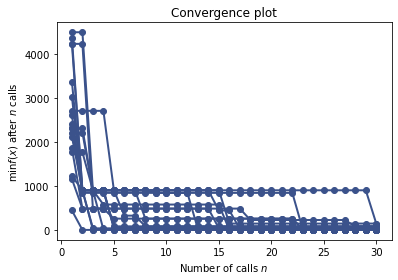

In [199]:

# run optimisations on full data sets

# run nested cross validation on full data set
print("results for all examples:")
scores_lr_nf, best_parameters_lr_nf, mis_classified_lr_nf, predictions_list_lr_nf = nested_cv_lr_nf(X_df,  labels, 3, 30)

# run nested cross validation without patient 75
print("\nresults for examples excluding patient 75:")

scores_lr_no75_nf, best_parameters_lr_no75_nf, mis_classified_lr_no75_nf, predictions_list_lr_no75_nf = nested_cv_lr_nf(X_df_no75, labels_no75, 3, 30)


In [206]:
# print results

print('The results for logistic regression with all 63 examples:')
print(scores_lr_nf)
print(best_parameters_lr_nf)
print(np.mean(np.asarray(scores_lr_nf), axis=0))
print(mis_classified_lr_nf)

print('The results for logistic regression without patient 75:')
print(scores_lr_no75_nf)
print(best_parameters_lr_no75_nf)
print(np.mean(np.asarray(scores_lr_no75_nf), axis=0))
print(mis_classified_lr_no75_nf)

The results for logistic regression with all 63 examples:
[(0.95, 1.0, 0.92, 0.9, 1.0), (0.95, 1.0, 0.92, 0.9, 1.0), (0.95, 0.9, 1.0, 1.0, 0.97), (0.95, 1.0, 0.91, 0.91, 0.99), (1.0, 1.0, 1.0, 1.0, 1.0), (0.9, 0.88, 0.92, 0.88, 0.94), (0.86, 1.0, 0.77, 0.73, 0.95), (1.0, 1.0, 1.0, 1.0, 1.0), (0.95, 1.0, 0.91, 0.91, 1.0)]
[[0.36419142683601513], [0.13350334367085442], [0.22845182219402574], [0.21847143468221883], [0.21522365073142738], [0.32280233033090033], [0.23503157275378297], [0.41394222057040864], [0.30969499222690094]]
[0.94555556 0.97555556 0.92777778 0.91444444 0.98333333]
[{'Con_165a': 'fp'}, {'Con_079': 'fp'}, {'Inf075': 'fn'}, {'Con_206': 'fp'}, {}, {'Con_079': 'fp', 'Inf075': 'fn'}, {'Con_087a': 'fp', 'Con_165a': 'fp', 'Con_181a': 'fp'}, {}, {'Con_206': 'fp'}]
The results for logistic regression without patient 75:
[(1.0, 1.0, 1.0, 1.0, 1.0), (0.9, 0.91, 0.9, 0.91, 0.97), (0.95, 1.0, 0.92, 0.88, 1.0), (1.0, 1.0, 1.0, 1.0, 1.0), (0.9, 1.0, 0.8, 0.85, 0.99), (1.0, 1.0, 1.0, 1

In [208]:
# create datafrom from the results:

def lr_results_df(scores, parameters, misclassified):
    p_list = []
    for i in parameters:
        p_list.extend(i)
    p_list = np.array(p_list)
    p_list = np.around(p_list, decimals=2)
    p_list = np.append(p_list, ['n/a'], axis=0)
    mean_scores = np.mean(np.asarray(scores), axis=0)
    array = np.array(scores)
    array = np.vstack((array, mean_scores))
    array = pd.DataFrame(array, index = [1, 2, 3, 4, 5, 6, 7, 8, 9, 'Total'], columns = ['Accuracy', 'Recall', 'Specificity', 'Precision', 'AUC'])
    array = array.round(2)
    array.insert(0, 'Best C', p_list)

    # create columns for false positives and false negatives
    fp_column = []
    fn_column = []
    for i in misclassified:
        fps = []
        fns = []
        for key, val in i.items():
            if val == 'fp':
                fps.append(key)
            if val == 'fn':
                fns.append(key)
        fp_column.append(fps)
        fn_column.append(fns)
    fp_column.append('n/a')
    fn_column.append('n/a')
    array.insert(6, 'False Positives', fp_column)
    array.insert(7, 'False Negatives', fn_column) 
    
    return array

In [209]:
# create dataframes of the results
lr_results_df_nf_inc75 = lr_results_df(scores_lr_nf, best_parameters_lr_nf, mis_classified_lr_nf)
lr_results_df_nf_inc75

,Best C,Accuracy,Recall,Specificity,Precision,AUC,False Positives,False Negatives
1,0.36,0.95,1.00,0.92,0.90,1.00,[Con_165a],[]
2,0.13,0.95,1.00,0.92,0.90,1.00,[Con_079],[]
3,0.23,0.95,0.90,1.00,1.00,0.97,[],[Inf075]
4,0.22,0.95,1.00,0.91,0.91,0.99,[Con_206],[]
5,0.22,1.00,1.00,1.00,1.00,1.00,[],[]
6,0.32,0.90,0.88,0.92,0.88,0.94,[Con_079],[Inf075]
7,0.24,0.86,1.00,0.77,0.73,0.95,"[Con_087a, Con_165a, Con_181a]",[]
8,0.41,1.00,1.00,1.00,1.00,1.00,[],[]
9,0.31,0.95,1.00,0.91,0.91,1.00,[Con_206],[]
Total,n/a,0.95,0.98,0.93,0.91,0.98,n/a,n/a


In [220]:
# results with no patient 75
lr_results_df_nf_no75 = lr_results_df(scores_lr_no75_nf, best_parameters_lr_no75_nf, mis_classified_lr_no75_nf)
lr_results_df_nf_no75

,Best C,Accuracy,Recall,Specificity,Precision,AUC,False Positives,False Negatives
1,0.41,1.00,1.00,1.00,1.00,1.00,[],[]
2,0.24,0.90,0.91,0.90,0.91,0.97,[Con_040],[Inf_149]
3,0.13,0.95,1.00,0.92,0.88,1.00,[Con_079],[]
4,0.28,1.00,1.00,1.00,1.00,1.00,[],[]
5,0.36,0.90,1.00,0.80,0.85,0.99,"[Con_087a, Con_165a]",[]
6,0.26,1.00,1.00,1.00,1.00,1.00,[],[]
7,0.14,0.90,1.00,0.87,0.75,1.00,"[Con_040, Con_165a]",[]
8,0.17,1.00,1.00,1.00,1.00,1.00,[],[]
9,0.27,1.00,1.00,1.00,1.00,1.00,[],[]
Total,n/a,0.96,0.99,0.94,0.93,1.00,n/a,n/a


In [225]:
# produce the LaTex code:

with open('lr_results_table_nf_inc75.tex','w') as tf:
    tf.write(lr_results_df_nf_inc75.to_latex())
    
with open('lr_results_table_nf_no75.tex','w') as tf:
    tf.write(lr_results_df_nf_no75.to_latex())

Best Parameters: [0.062025400509534125]


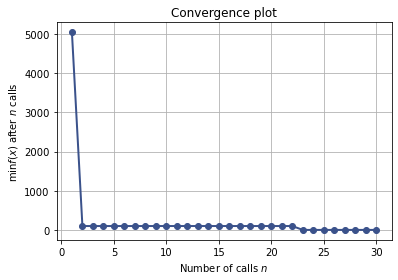

In [272]:
# re-training the final model on the full dataset to identify the selected features    
# extract coefficients based on model type

final_lr_nf, best_param_lr_nf = train_lr_baysian_nf(X_df_no75, labels_no75, 10)

In [277]:
selected_features_lr_nf = final_lr_nf.coef_[0]
selected_gene_lr_nf_final = identify_genes_from_coefs(selected_features_lr_nf, X_df, gene_df)
print(selected_gene_lr_nf_final)

[('ID3', -0.19565298549757815), ('NMT2', -0.17498202419726108), ('UBE2Q2', -0.16437057378746847), ('HS.276860', -0.08379997661740486), ('LRRN3', -0.03201046829009292), ('GSN', 0.02603898209488072), ('NBEAL2', 0.03263330502201915), ('P2RX1', 0.05143188543226201), ('SLC2A3', 0.056514223565280616), ('B4GALT5', 0.07559100036140674)]


The number of selected genes is:  10


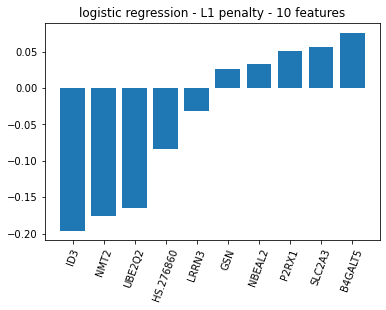

In [276]:
print('The number of selected genes is:  '+str(len(selected_gene_lr_nf_final)))
plot_genes(selected_gene_lr_nf_final, model='logistic regression - L1 penalty - 10 features')

In [224]:
# saving down results of the model

with open('lr_results_nf.pkl', 'wb') as f:
    pickle.dump([scores_lr_nf, best_parameters_lr_nf, mis_classified_lr_nf, selected_features_lr_nf, predictions_list_lr_nf,
                 scores_lr_no75_nf, best_parameters_lr_no75_nf, mis_classified_lr_no75_nf, predictions_list_lr_no75_nf], f)

with open('lr_final_model_nf.pkl', 'wb') as f:
    pickle.dump([final_lr_nf, best_param_lr_nf], f)


Best Parameters: [0.20210075780719755]
Best Parameters: [0.15527366913030488]
Best Parameters: [0.28830018344449415]
Best Parameters: [0.1105845983023258]
Best Parameters: [0.23182740791852263]
Best Parameters: [0.09319077498810362]
Best Parameters: [0.06788137224085371]
Best Parameters: [0.21071215147880734]
Best Parameters: [0.18317503897828863]


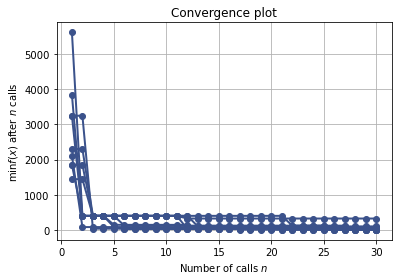

In [267]:
scores_lr_20f, best_parameters_lr_20f, mis_classified_lr_20f, predictions_list_lr_20f = nested_cv_lr_nf(X_df_no75, labels_no75, 3, 20)


In [268]:
print('The results for logistic regression with 20 features:')
print(scores_lr_20f)
print(best_parameters_lr_20f)
print(np.mean(np.asarray(scores_lr_20f), axis=0))
print(mis_classified_lr_20f)

The results for logistic regression with 20 features:
[(1.0, 1.0, 1.0, 1.0, 1.0), (1.0, 1.0, 1.0, 1.0, 1.0), (0.85, 1.0, 0.73, 0.75, 0.97), (1.0, 1.0, 1.0, 1.0, 1.0), (0.86, 1.0, 0.73, 0.77, 0.97), (0.95, 0.91, 1.0, 1.0, 1.0), (1.0, 1.0, 1.0, 1.0, 1.0), (0.95, 1.0, 0.91, 0.91, 1.0), (1.0, 1.0, 1.0, 1.0, 1.0)]
[[0.20210075780719755], [0.15527366913030488], [0.28830018344449415], [0.1105845983023258], [0.23182740791852263], [0.09319077498810362], [0.06788137224085371], [0.21071215147880734], [0.18317503897828863]]
[0.95666667 0.99       0.93       0.93666667 0.99333333]
[{}, {}, {'Con_087a': 'fp', 'Con_165a': 'fp', 'Con_181a': 'fp'}, {}, {'Con_087a': 'fp', 'Con_165a': 'fp', 'Con_206': 'fp'}, {'Inf_149': 'fn'}, {}, {'Con_165a': 'fp'}, {}]


Best Parameters: [0.09532380836598507]
Best Parameters: [0.21651828423108616]
Best Parameters: [0.12144769519395854]
Best Parameters: [0.1590858337067758]
Best Parameters: [0.11601652580436156]
Best Parameters: [0.11378283013084609]
Best Parameters: [0.11564979526015824]
Best Parameters: [0.09573375814150448]
Best Parameters: [0.1040315215133702]
The results for logistic regression with 15 features:
[(0.9, 1.0, 0.8, 0.85, 0.98), (1.0, 1.0, 1.0, 1.0, 1.0), (1.0, 1.0, 1.0, 1.0, 1.0), (0.95, 1.0, 0.92, 0.89, 0.99), (1.0, 1.0, 1.0, 1.0, 1.0), (1.0, 1.0, 1.0, 1.0, 1.0), (1.0, 1.0, 1.0, 1.0, 1.0), (0.9, 1.0, 0.83, 0.82, 1.0), (0.95, 1.0, 0.93, 0.86, 1.0)]
[[0.09532380836598507], [0.21651828423108616], [0.12144769519395854], [0.1590858337067758], [0.11601652580436156], [0.11378283013084609], [0.11564979526015824], [0.09573375814150448], [0.1040315215133702]]
[0.96666667 1.         0.94222222 0.93555556 0.99666667]
[{'Con_165a': 'fp', 'Con_206': 'fp'}, {}, {}, {'Con_040': 'fp'}, {}, {}, {}, {'

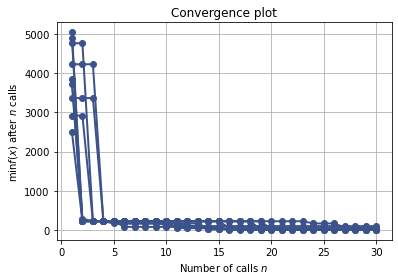

In [269]:
#15
scores_lr_15f, best_parameters_lr_15f, mis_classified_lr_15f, predictions_list_lr_15f = nested_cv_lr_nf(X_df_no75, labels_no75, 3, 15)
print('The results for logistic regression with 15 features:')
print(scores_lr_15f)
print(best_parameters_lr_15f)
print(np.mean(np.asarray(scores_lr_15f), axis=0))
print(mis_classified_lr_15f)

Best Parameters: [0.061173522846718564]
Best Parameters: [0.12857894567830902]
Best Parameters: [0.1224939586389261]
Best Parameters: [0.1320200102071953]
Best Parameters: [0.17639794023542552]
Best Parameters: [0.09223768524264356]
Best Parameters: [0.1728533069728012]
Best Parameters: [0.10949761291731411]
Best Parameters: [0.1053673203699615]
The results for logistic regression with 10 features:
[(1.0, 1.0, 1.0, 1.0, 1.0), (0.95, 1.0, 0.92, 0.89, 0.98), (1.0, 1.0, 1.0, 1.0, 1.0), (0.95, 1.0, 0.9, 0.92, 0.99), (1.0, 1.0, 1.0, 1.0, 1.0), (1.0, 1.0, 1.0, 1.0, 1.0), (1.0, 1.0, 1.0, 1.0, 1.0), (1.0, 1.0, 1.0, 1.0, 1.0), (0.95, 1.0, 0.9, 0.91, 0.99)]
[[0.061173522846718564], [0.12857894567830902], [0.1224939586389261], [0.1320200102071953], [0.17639794023542552], [0.09223768524264356], [0.1728533069728012], [0.10949761291731411], [0.1053673203699615]]
[0.98333333 1.         0.96888889 0.96888889 0.99555556]
[{}, {'Con_165a': 'fp'}, {}, {'Con_165a': 'fp'}, {}, {}, {}, {}, {'Con_165a': 'fp'

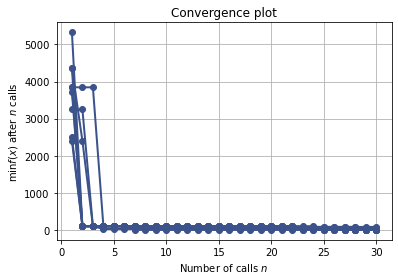

In [270]:
# 10
scores_lr_10f, best_parameters_lr_10f, mis_classified_lr_10f, predictions_list_lr_10f = nested_cv_lr_nf(X_df_no75, labels_no75, 3, 10)
print('The results for logistic regression with 10 features:')
print(scores_lr_10f)
print(best_parameters_lr_10f)
print(np.mean(np.asarray(scores_lr_10f), axis=0))
print(mis_classified_lr_10f)

Best Parameters: [0.08956169397489563]
Best Parameters: [0.06579769415897893]
Best Parameters: [0.07043434147708279]
Best Parameters: [0.07257933127471294]
Best Parameters: [0.07632160960287802]
Best Parameters: [0.00719286012192526]


/Users/Ed/Anaconda/anaconda3/envs/keras_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best Parameters: [0.09027021716477186]
Best Parameters: [2.183670564948289e-05]


/Users/Ed/Anaconda/anaconda3/envs/keras_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best Parameters: [0.07233292180577525]
The results for logistic regression with 5 features:
[(0.95, 1.0, 0.88, 0.93, 1.0), (0.86, 1.0, 0.8, 0.67, 0.98), (0.95, 0.88, 1.0, 1.0, 1.0), (1.0, 1.0, 1.0, 1.0, 1.0), (1.0, 1.0, 1.0, 1.0, 1.0), (0.45, 0.0, 1.0, 0.0, 0.5), (1.0, 1.0, 1.0, 1.0, 1.0), (0.62, 0.0, 1.0, 0.0, 0.5), (1.0, 1.0, 1.0, 1.0, 1.0)]
[[0.08956169397489563], [0.06579769415897893], [0.07043434147708279], [0.07257933127471294], [0.07632160960287802], [0.00719286012192526], [0.09027021716477186], [2.183670564948289e-05], [0.07233292180577525]]
[0.87       0.76444444 0.96444444 0.73333333 0.88666667]
[{'Con_206': 'fp'}, {'Con_087a': 'fp', 'Con_165a': 'fp', 'Con_181a': 'fp'}, {'Inf_149': 'fn'}, {}, {}, {'Inf_009': 'fn', 'Inf_047': 'fn', 'Inf_082': 'fn', 'Inf_125': 'fn', 'Inf_133': 'fn', 'Inf_152': 'fn', 'Inf_157': 'fn', 'Inf_159a': 'fn', 'Inf_164': 'fn', 'Inf_191': 'fn', 'Inf_203': 'fn'}, {}, {'Inf_009': 'fn', 'Inf_047': 'fn', 'Inf_116': 'fn', 'Inf_125': 'fn', 'Inf_149': 'fn', 'Inf

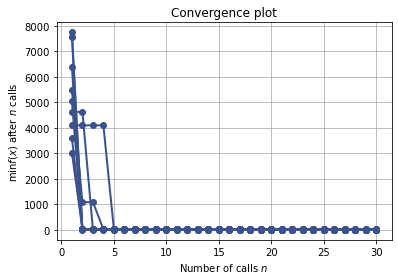

In [271]:
# 5
scores_lr_5f, best_parameters_lr_5f, mis_classified_lr_5f, predictions_list_lr_5f = nested_cv_lr_nf(X_df_no75, labels_no75, 3, 5)
print('The results for logistic regression with 5 features:')
print(scores_lr_5f)
print(best_parameters_lr_5f)
print(np.mean(np.asarray(scores_lr_5f), axis=0))
print(mis_classified_lr_5f)

### Illustration: Precision and Recall at different thresholds

In [264]:
# illustration that precision / recall change based on the threshold selected

# code credit for moving thresholds - https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/

y_predictions, y_probabilities, y_true_classes = predictions_list_lr_nf[1]
y_probabilities = y_probabilities[:, 1]

# code for using Youden's J statistic to find the optimisal threshold

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_true_classes, y_probabilities)

# get the best threshold
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

def predict_class(probs, threshold):
    class_predictions = []
    for probab in probs:
        if probab >= threshold:
            class_predictions.append(1)
        else:
            class_predictions.append(0)
    return class_predictions

predictions_list = []
thesholds = [0.1, 0.3, 0.5, 0.55, 0.6]
for t in thesholds:
    pred_classes = predict_class(y_probabilities, t)
    acc = round(accuracy_score(y_true_classes, pred_classes),2)
    rec = round(recall_score(y_true_classes, pred_classes),2)
    presc = round(precision_score(y_true_classes, pred_classes),2)
    pred_classes.append(acc)
    pred_classes.append(rec)
    pred_classes.append(presc)
    predictions_list.append(pred_classes)
y_true_classes = np.hstack((y_true_classes, np.array(['-', '-', '-'])))
predictions_list.append(y_true_classes)
array_2 = np.array(predictions_list)
print(array_2)

index = [0.1, 0.3, 0.5, 0.55, 0.6, 'True Class']
columns = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9','p10', 'p11', 'p12',
           'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19', 'p20', 'p21', 'Accuracy', 'Recall', 'Precision']

df_threshold_illustration = pd.DataFrame(array_2, index=index, columns=columns)
df_threshold_illustration.index.name = 'Threshold'

with open('lr_thresholds_illustration.tex','w') as tf:
    tf.write(df_threshold_illustration.to_latex())
    
df_threshold_illustration



Best Threshold=0.552731
[['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
  '1' '1' '1' '0.43' '1.0' '0.43']
 ['0' '0' '0' '0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
  '1' '1' '1' '0.62' '1.0' '0.53']
 ['0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '1' '1' '1' '1' '1' '1'
  '1' '1' '1' '0.95' '1.0' '0.9']
 ['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '1' '1' '1' '1' '1'
  '1' '1' '1' '1.0' '1.0' '1.0']
 ['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '1' '1' '1' '1' '1'
  '0' '1' '1' '0.95' '0.89' '1.0']
 ['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '1' '1' '1' '1' '1'
  '1' '1' '1' '-' '-' '-']]


,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,...,p15,p16,p17,p18,p19,p20,p21,Accuracy,Recall,Precision
Threshold,,,,,,,,,,,,,,,,,,,,,
0.1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0.43,1.0,0.43
0.3,0,0,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0.62,1.0,0.53
0.5,0,0,0,0,0,0,0,1,0,0,...,1,1,1,1,1,1,1,0.95,1.0,0.9
0.55,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1.0,1.0,1.0
0.6,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,1,1,0.95,0.89,1.0
True Class,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,-,-,-


# Classifier 2: SVM

1. Initial approach, simple Linear SVM with L1 penalty to search for approx 30 features.
2. Followed by SVM + RFE as alternative approach to feature selection (wrapper method), aiming for improved model performance and similar number of features ultimately.
- Due to run time, initial feature selection using kbest feature selection and mutual information gain. Limitation.
- Further feature selection using recursive feature selection (RFE) to get down the the best performing set of features on linear svm

References:
- https://machinelearningmastery.com/rfe-feature-selection-in-python/
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
- https://machinelearningmastery.com/rfe-feature-selection-in-python/
- important point - use pipeline so that the same train and validation sets are used for both the feature
- selection and the hyperparameter tuning, avoiding data leakage from train to val. Here not
- tuning hyper parameters, but want to do all the fit transforms in a chain, to use the nested CV loop

### SVM - with L1 penalty, as alternative to RFE

In [286]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV, ParameterGrid
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, RepeatedKFold
from numpy.random import uniform
import operator
from sklearn.pipeline import make_pipeline, Pipeline
from skopt.space import Categorical
import pickle

In [296]:
# alternative optimisation function to solve for a fixed number of features

def nested_cv_svm_nf(df, labels, n_repeats):

    # configure the cross-validation procedure
    cv_outer = RepeatedKFold(n_splits=3, n_repeats=n_repeats)

    # lists to collect scores from each outer fold
    scores_list = []
    best_parameters_list = []
    mis_classified_list = []

    # create inner loop for hyper parameter optimisation
    for train_ix, test_ix in cv_outer.split(df):

        # split data
        X_train, X_test = df.iloc[train_ix, :], df.iloc[test_ix, :]
        y_train, y_test = labels[train_ix], labels[test_ix]

        model, best_parameter = train_svm_baysian_nf(X_train, y_train)

        # predict on the test set and store the selected features
        y_pred = model.predict(X_test)
        
        # evaluate the model
        scores = score_model_no_auc(y_pred, y_test)
        mis_classified = mis_class_points(X_test, y_pred, y_test)

        # add scores for this train test split to lists collecting scores for all splits
        scores_list.append(scores)
        best_parameters_list.append(best_parameter)
        mis_classified_list.append(mis_classified)
    
    return scores_list, best_parameters_list, mis_classified_list


def train_svm_baysian_nf(X_train, y_train):

    # define hyper paramaeter search space
    hyper_p_c = Real(1e-6, 100.0, 'log-uniform', name='alpha') #name='C') 
    search_space_svm = [hyper_p_c]
    target_features = 30

    # define the objective function to optimise over the hyper-parameter search space.
    @use_named_args(search_space_svm)
    def evaluate_model(**params):
        # define the model
        #model = LinearSVC(penalty='l1', dual=False, max_iter=1000)
        model = SGDClassifier(loss='hinge', penalty='l1', max_iter=1000)
        model.set_params(**params)
        model.fit(X_train, y_train)

        n_nonzero = np.sum(model.coef_ != 0)
        return (target_features-n_nonzero)**2

    # perform optimization
    # result = gp_minimize(evaluate_model, search_space_svm, n_calls=30)
    result = gp_minimize(evaluate_model, search_space_svm, acq_func="EI", x0=[1.0], n_initial_points=20, n_calls=30)

    # save the best performing value of hyper parameter C
    best_parameter = result.x
    print('Best Parameters: %s' % (result.x))
    plot_convergence(result)

    # retrain the model with fixed value of C
    # model = LinearSVC(penalty='l1', C=best_parameter[0], dual=False, max_iter=10000)
    model = SGDClassifier(loss='hinge', penalty='l1', max_iter=1000)
    model.fit(X_train, y_train)

    return model, best_parameter


Best Parameters: [0.19674125944058293]
Best Parameters: [0.07922884684112094]
Best Parameters: [0.06721272302268992]
The results for svm with test examples:
[(0.86, 0.8, 0.91, 0.89), (0.9, 1.0, 0.85, 0.8), (0.76, 0.9, 0.64, 0.69)]
[[0.19674125944058293], [0.07922884684112094], [0.06721272302268992]]
[0.84       0.9        0.8        0.79333333]
[{'Con_048': 'fp', 'Inf_149': 'fn', 'Inf_157': 'fn'}, {'Con_072': 'fp', 'Con_079': 'fp'}, {'Con_087a': 'fp', 'Con_165a': 'fp', 'Con_200': 'fp', 'Con_206': 'fp', 'Inf_114': 'fn'}]


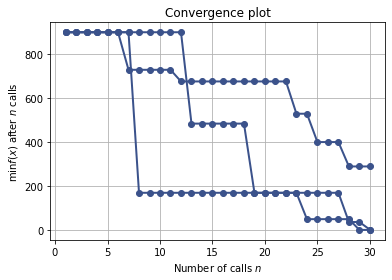

In [297]:
# train the model on the test data and print results
scores_svm_red_nf, best_parameters_svm_red_nf, mis_classified_svm_red_nf = nested_cv_svm_nf(X_df_red, labels, 1)

print('The results for svm with test examples:')
print(scores_svm_red_nf)
print(best_parameters_svm_red_nf)
print(np.mean(np.asarray(scores_svm_red_nf), axis=0))
print(mis_classified_svm_red_nf)

Best Parameters: [0.44832358822621804]
Best Parameters: [6.203132958797185]
Best Parameters: [0.22068324331379455]
Best Parameters: [10.53822354898137]
Best Parameters: [0.7294762062030326]
Best Parameters: [1.4861776775650348]
Best Parameters: [0.2571882998453008]
Best Parameters: [0.2510708036989323]
Best Parameters: [0.8264528691006222]


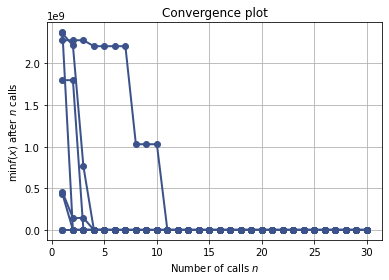

In [133]:
# train the model on full dataset

scores_svm_nf, best_parameters_svm_nf, mis_classified_svm_nf = nested_cv_svm_nf(X_df, labels, 3)
scores_svm_no75_nf, best_parameters_svm_no75_nf, mis_classified_svm_no75_nf = nested_cv_svm_nf(X_df_no75, labels_no75, 3)


In [134]:
# print results

print('The results for svm with all 63 examples:')
print(scores_svm_nf)
print(best_parameters_svm_nf)
print(np.mean(np.asarray(scores_svm_nf), axis=0))
print(mis_classified_svm_nf)

print('The results for svm without patient 75:')
print(scores_svm_no75_nf)
print(best_parameters_svm_no75_nf)
print(np.mean(np.asarray(scores_svm_no75_nf), axis=0))
print(mis_classified_svm_no75_nf)

The results for svm with test examples:
[(0.86, 1.0, 0.73), (0.9, 0.91, 0.91), (0.9, 0.89, 0.89)]
[[100.0], [38.67875438766363], [100.0]]
[0.88666667 0.93333333 0.84333333]
[{'Con_067': 'fp', 'Con_165a': 'fp', 'Con_206': 'fp'}, {'Con_079': 'fp', 'Inf075': 'fn'}, {'Con_087a': 'fp', 'Inf_149': 'fn'}]
The results for svm with all 63 examples:
[(1.0, 1.0, 1.0), (0.95, 1.0, 0.91), (0.95, 0.89, 1.0), (0.86, 1.0, 0.75), (0.86, 1.0, 0.77), (0.86, 0.89, 0.8), (0.81, 0.86, 0.67), (0.86, 0.89, 0.8), (1.0, 1.0, 1.0)]
[[0.6311385118212467], [0.5181795686122717], [0.3003907364634254], [4.401180517316189], [0.37200974601608905], [0.5512325780234016], [0.5095098606265706], [2.0056949255899474], [0.3111031128399527]]
[0.90555556 0.94777778 0.85555556]
[{}, {'Con_087a': 'fp'}, {'Inf075': 'fn'}, {'Con_021': 'fp', 'Con_029': 'fp', 'Con_040': 'fp'}, {'Con_087a': 'fp', 'Con_165a': 'fp', 'Con_206': 'fp'}, {'Con_071': 'fp', 'Con_079': 'fp', 'Inf075': 'fn'}, {'Con_067': 'fp', 'Con_071': 'fp', 'Con_079': 'fp', 

Best Parameters: [0.18125853961866795]


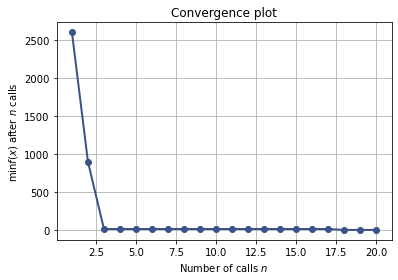

In [136]:
# re-training the final model on the full dataset to identify the selected features    
# extract coefficients based on model type

final_svm_nf, best_param_svm_nf = train_lr_baysian_nf(X_df, labels)

In [168]:
selected_features_svm_nf = final_svm_nf.coef_[0]
selected_gene_svm_nf_final = identify_genes_from_coefs(selected_features_svm_nf, X_df, gene_df)


The number of selected genes is:  30


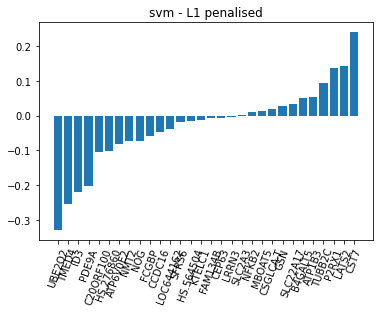

In [169]:
print('The number of selected genes is:  '+str(len(selected_gene_svm_nf_final)))
plot_genes(selected_gene_svm_nf_final, model='svm - L1 penalised')

### SVM with Baysian Optimisation of hyper parameter C, with RFE


In [301]:
# function to implement univariate feature selection based on kbest, to n_features

def filter_features(X_train, y_train, X_test, n_features):
    fs=SelectKBest(mutual_info_classif, k=n_features).fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    gene_list = list(zip(X_train.columns, fs.get_support()))
    new_features = []
    for gene in gene_list:
        if gene[1] == True:
            new_features.append(gene[0])
    X_train = pd.DataFrame(X_train_fs, columns=new_features, index=X_train.index)
    X_test = pd.DataFrame(X_test_fs, columns=new_features, index=X_test.index)
    return X_train, X_test

def filter_features_final(X_train, y_train, n_features):
    fs=SelectKBest(mutual_info_classif, k=n_features).fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    gene_list = list(zip(X_train.columns, fs.get_support()))
    new_features = []
    for gene in gene_list:
        if gene[1] == True:
            new_features.append(gene[0])
    X_train = pd.DataFrame(X_train_fs, columns=new_features, index=X_train.index)
    return X_train, new_features

In [306]:
# nexted cross validation function for SVM

def nested_cv_svm_baysian(df, labels, n_repeats, in_features, out_features):
    '''dataframe, labels, integer -> lists of scores, best hyper parameters, selected features, mis-classified points
    
    This function implements a nested cross validation. The outer loop is a repeated k fold, that creates multiple
    alternative train / test splits. The inner loop performs hyper parameter optimisation and feature selection using
    recursive feature elimination using an SVM model.
    '''
    
    # configure the cross-validation procedure
    cv_outer = RepeatedKFold(n_splits=3, n_repeats=n_repeats)

    # lists to collect scores from each outer fold
    scores_list = []
    best_parameters_list = []
    mis_classified_list = []

    # create inner loop for hyper parameter optimisation
    for train_ix, test_ix in cv_outer.split(df):

        # split data
        X_train, X_test = df.iloc[train_ix, :], df.iloc[test_ix, :]
        y_train, y_test = labels[train_ix], labels[test_ix]

        # implement univariate feature selection
        X_train, X_test = filter_features(X_train, y_train, X_test, in_features)
        
        # train and fit the model
        model, best_C = train_svm_baysian(X_train, y_train, out_features)
        
        # model predictions on the test set
        y_pred = model.predict(X_test)
        y_pred_probab = model.predict_proba(X_test)

        # evaluate the model
        scores = score_model(y_pred, y_pred_probab, y_test)
        mis_classified = mis_class_points(X_test, y_pred, y_test)
        
        # add scores to lists
        scores_list.append(scores)
        best_parameters_list.append(best_C)
        mis_classified_list.append(mis_classified)

    return scores_list, best_parameters_list, mis_classified_list

# Baysian optimisation with Gaussian processes for SVM hyper parameter optimisation

def train_svm_baysian(X_train, y_train, out_features):
    
    # define hyper paramaeter search space
    hyper_p_c = Real(1e-6, 100.0, 'log-uniform', name='C')
    search_space_svm = [hyper_p_c] 

    # define the objective function to optimise
    @use_named_args(search_space_svm)
    def evaluate_model(**params):
        cv_inner = LeaveOneOut()
        y_val_classes = []
        y_val_predictions = []
        for train_index, val_index in cv_inner.split(X_train):

            X_train_inner, X_val = X_train.iloc[train_index, :], X_train.iloc[val_index, :]
            y_train_inner, y_val = y_train[train_index], y_train[val_index]                

            # define the pipeline
            svc = SVC(kernel="linear", probability=True)  
            svc.set_params(**params)
            rfe = RFE(estimator=svc, n_features_to_select=out_features, step=20)
            svm_pipeline = Pipeline(steps=[('rfe', rfe),
                                           ('model', svc)])
            
            svm_pipeline.fit(X_train_inner, y_train_inner)

            y_val_pred = svm_pipeline.predict(X_val)
            y_val_classes.append(y_val)
            y_val_predictions.append(y_val_pred)

        score = accuracy_score(y_val_classes, y_val_predictions)
        return 1.0 - score
    
    # perform gp optimization, and store best hyper parameters
    result = gp_minimize(evaluate_model, search_space_svm, n_calls=20)
    plot_convergence(result)
    plt.savefig("svm_best_features_nf.jpeg")
    best_C = result.x[0]

    print('Best score: %.3f' % (1.0 - result.fun))
    print('Best C: %s' % (best_C))

    # retrain the model with selected hyper parameters
    clf = SVC(kernel="linear", C=best_C, probability=True)
    feature_elim = RFE(estimator=clf, n_features_to_select=out_features, step=20)
    model = Pipeline(steps=[('feature_elim', feature_elim),
                            ('clf', clf)])
    
    model.fit(X_train, y_train)

    return model, best_C


Best score: 0.905
Best C: 0.031542324060620734
Best score: 0.905
Best C: 0.0044246304375827016
Best score: 0.929
Best C: 0.013139626669850642
The results for svm with test examples:
[(0.9, 0.9, 0.91, 0.9, 0.94), (0.9, 0.86, 0.93, 0.86, 0.99), (0.95, 0.91, 1.0, 1.0, 0.99)]
[0.031542324060620734, 0.0044246304375827016, 0.013139626669850642]
[0.91666667 0.89       0.94666667 0.92       0.97333333]
[{'Con_206': 'fp', 'Inf_149': 'fn'}, {'Con_087a': 'fp', 'Inf_119': 'fn'}, {'Inf075': 'fn'}]


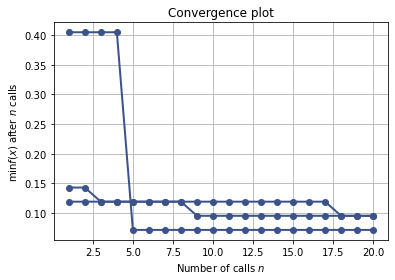

In [307]:
# train model on test set and print results
scores_svm_red_b, best_parameters_svm_red_b, mis_classified_svm_red_b = nested_cv_svm_baysian(X_df_red, labels, 1, 150, 20)

print('The results for svm with test examples:')
print(scores_svm_red_b)
print(best_parameters_svm_red_b)
print(np.mean(np.asarray(scores_svm_red_b), axis=0))
print(mis_classified_svm_red_b)


Best score: 0.951
Best C: 0.03264960042188337
Best score: 0.976
Best C: 0.031053075492546153
Best score: 1.000
Best C: 0.03020443973393471
Best score: 1.000
Best C: 0.02007381065233092
Best score: 1.000
Best C: 0.02548418290644615
Best score: 0.976
Best C: 0.10607755608106045
Best score: 1.000
Best C: 0.056915762401948185
Best score: 1.000
Best C: 0.04496421059106748
Best score: 1.000
Best C: 24.604216274213773


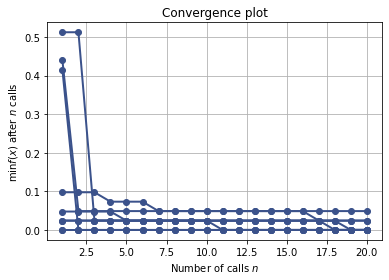

In [353]:
# training to get 5 features
scores_svm_no75_b5, best_parameters_svm_no75_b5, mis_classified_svm_no75_b5 = nested_cv_svm_baysian(X_df_no75, labels_no75, 3, 250, 5)


Best score: 0.976
Best C: 0.006949059138574245
Best score: 1.000
Best C: 0.011618162423235389
Best score: 1.000
Best C: 0.5461973764576722
Best score: 1.000
Best C: 0.019187127314925372
Best score: 0.976
Best C: 0.007967608972975458
Best score: 1.000
Best C: 0.053957940268581694
Best score: 1.000
Best C: 50.48286834239315
Best score: 1.000
Best C: 0.007261309233962413
Best score: 1.000
Best C: 0.013213437987028804
Best score: 1.000
Best C: 0.006645052331589638
Best score: 0.951
Best C: 0.03900719184810335
Best score: 1.000
Best C: 0.008346558885092933
Best score: 1.000
Best C: 0.21987184445649716
Best score: 0.976
Best C: 0.01054157586449068
Best score: 1.000
Best C: 0.1313922918091414
Best score: 1.000
Best C: 0.0241402175667477
Best score: 0.976
Best C: 3.6891028977294167
Best score: 0.976
Best C: 0.010880047708617026
Best score: 1.000
Best C: 2.0323715285713595
Best score: 1.000
Best C: 8.38289328521215
Best score: 0.952
Best C: 17.364313280520523
Best score: 1.000
Best C: 83.011026

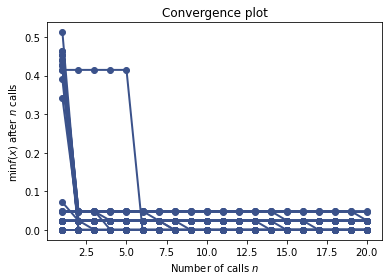

In [310]:
# train and evaluate models

#scores_svm_b, best_parameters_svm_b, mis_classified_svm_b = nested_cv_svm_baysian(X_df, labels, 3, 250, 20)
scores_svm_no75_b10, best_parameters_svm_no75_b10, mis_classified_svm_no75_b10 = nested_cv_svm_baysian(X_df_no75, labels_no75, 3, 250, 10)
scores_svm_no75_b15, best_parameters_svm_no75_b15, mis_classified_svm_no75_b15 = nested_cv_svm_baysian(X_df_no75, labels_no75, 3, 250, 15)
scores_svm_no75_b20, best_parameters_svm_no75_b20, mis_classified_svm_no75_b20 = nested_cv_svm_baysian(X_df_no75, labels_no75, 3, 250, 20)
scores_svm_no75_b30, best_parameters_svm_no75_b30, mis_classified_svm_no75_b30 = nested_cv_svm_baysian(X_df_no75, labels_no75, 3, 250, 30)


In [357]:
# print results

print('The results for svm without patient 75 - 5 features:')
print(scores_svm_no75_b5)
print(best_parameters_svm_no75_b5)
print(np.mean(np.asarray(scores_svm_no75_b5), axis=0))
print(mis_classified_svm_no75_b5)

print('The results for svm without patient 75 - 10 features:')
print(scores_svm_no75_b10)
print(best_parameters_svm_no75_b10)
print(np.mean(np.asarray(scores_svm_no75_b10), axis=0))
print(mis_classified_svm_no75_b10)

print('\nThe results for svm without patient 75 - 15 features:')
print(scores_svm_no75_b15)
print(best_parameters_svm_no75_b15)
print(np.mean(np.asarray(scores_svm_no75_b15), axis=0))
print(mis_classified_svm_no75_b15)

print('\nThe results for svm without patient 75 - 20 features:')
print(scores_svm_no75_b20)
print(best_parameters_svm_no75_b20)
print(np.mean(np.asarray(scores_svm_no75_b20), axis=0))
print(mis_classified_svm_no75_b20)

print('\nThe results for svm without patient 75 - 30 features:')
print(scores_svm_no75_b30)
print(best_parameters_svm_no75_b30)
print(np.mean(np.asarray(scores_svm_no75_b30), axis=0))
print(mis_classified_svm_no75_b30)

The results for svm without patient 75 - 5 features:
[(0.95, 0.89, 1.0, 1.0, 0.98), (1.0, 1.0, 1.0, 1.0, 1.0), (1.0, 1.0, 1.0, 1.0, 1.0), (1.0, 1.0, 1.0, 1.0, 1.0), (0.86, 1.0, 0.73, 0.77, 0.95), (1.0, 1.0, 1.0, 1.0, 1.0), (0.95, 1.0, 0.92, 0.9, 1.0), (0.9, 0.75, 1.0, 1.0, 0.93), (1.0, 1.0, 1.0, 1.0, 1.0)]
[0.03264960042188337, 0.031053075492546153, 0.03020443973393471, 0.02007381065233092, 0.02548418290644615, 0.10607755608106045, 0.056915762401948185, 0.04496421059106748, 24.604216274213773]
[0.96222222 0.96       0.96111111 0.96333333 0.98444444]
[{'Inf_149': 'fn'}, {}, {}, {}, {'Con_087a': 'fp', 'Con_165a': 'fp', 'Con_181a': 'fp'}, {}, {'Con_165a': 'fp'}, {'Inf_149': 'fn', 'Inf_198': 'fn'}, {}]
The results for svm without patient 75 - 10 features:
[(1.0, 1.0, 1.0, 1.0, 1.0), (1.0, 1.0, 1.0, 1.0, 1.0), (0.95, 0.89, 1.0, 1.0, 1.0), (1.0, 1.0, 1.0, 1.0, 1.0), (1.0, 1.0, 1.0, 1.0, 1.0), (0.95, 0.9, 1.0, 1.0, 0.93), (0.9, 0.78, 1.0, 1.0, 1.0), (0.95, 0.88, 1.0, 1.0, 1.0), (0.95, 0.9, 1.

In [358]:
# saving down results of the model
import pickle

#with open('svm_results_b.pkl', 'wb') as f:
#    pickle.dump([scores_svm_b, best_parameters_svm_b, mis_classified_svm_b], f)

with open('svm_results_no75_b.pkl', 'wb') as f:
    pickle.dump([scores_svm_no75_b5, best_parameters_svm_no75_b5, mis_classified_svm_no75_b5,
                 scores_svm_no75_b10, best_parameters_svm_no75_b10, mis_classified_svm_no75_b10,
                 scores_svm_no75_b15, best_parameters_svm_no75_b15, mis_classified_svm_no75_b15,
                 scores_svm_no75_b20, best_parameters_svm_no75_b20, mis_classified_svm_no75_b20,
                 scores_svm_no75_b30, best_parameters_svm_no75_b30, mis_classified_svm_no75_b30], f)

    #with open('svm_results.pkl', 'rb') as f:
#    a, b, c, d, e, f, g, h = pickle.load(f)

In [317]:
# function to convert svm results to dataframe:

def svm_results_df(scores, parameters, misclassified):
    p_list = np.array(parameters)
    p_list = np.around(p_list, decimals=2)
    p_list = np.append(p_list, ['n/a'], axis=0)
    mean_scores = np.mean(np.asarray(scores), axis=0)
    array = np.array(scores)
    array = np.vstack((array, mean_scores))
    array = pd.DataFrame(array, index = [1, 2, 3, 4, 5, 6, 7, 8, 9, 'Total'], columns = ['Accuracy', 'Recall', 'Specificity', 'Precision', 'AUC'])
    array = array.round(2)
    array.insert(0, 'Best C', p_list)

    # create columns for false positives and false negatives
    fp_column = []
    fn_column = []
    for i in misclassified:
        fps = []
        fns = []
        for key, val in i.items():
            if val == 'fp':
                fps.append(key)
            if val == 'fn':
                fns.append(key)
        fp_column.append(fps)
        fn_column.append(fns)
    fp_column.append('n/a')
    fn_column.append('n/a')
    array.insert(6, 'False Positives', fp_column)
    array.insert(7, 'False Negatives', fn_column) 
    
    return array

In [322]:
# results with no patient 75
svm_results_df_nf_no75_b5  = svm_results_df(scores_svm_no75_b5, best_parameters_svm_no75_b5, mis_classified_svm_no75_b5)
svm_results_df_nf_no75_b10 = svm_results_df(scores_svm_no75_b10, best_parameters_svm_no75_b10, mis_classified_svm_no75_b10)
svm_results_df_nf_no75_b15 = svm_results_df(scores_svm_no75_b15, best_parameters_svm_no75_b15, mis_classified_svm_no75_b15)
svm_results_df_nf_no75_b20 = svm_results_df(scores_svm_no75_b20, best_parameters_svm_no75_b20, mis_classified_svm_no75_b20)
svm_results_df_nf_no75_b30 = svm_results_df(scores_svm_no75_b30, best_parameters_svm_no75_b30, mis_classified_svm_no75_b30)


In [323]:
# display dataframe

svm_results_df_nf_no75_b30

,Best C,Accuracy,Recall,Specificity,Precision,AUC,False Positives,False Negatives
1,0.0,0.95,1.00,0.92,0.89,1.00,[Con_165a],[]
2,35.24,0.95,0.89,1.00,1.00,0.96,[],[Inf_149]
3,14.93,1.00,1.00,1.00,1.00,1.00,[],[]
4,66.26,0.95,0.90,1.00,1.00,0.99,[],[Inf_149]
5,0.01,1.00,1.00,1.00,1.00,1.00,[],[]
6,0.02,0.95,1.00,0.92,0.88,1.00,[Con_165a],[]
7,3.25,1.00,1.00,1.00,1.00,1.00,[],[]
8,0.01,0.90,0.89,0.92,0.89,0.96,[Con_165a],[Inf_149]
9,9.13,1.00,1.00,1.00,1.00,1.00,[],[]
Total,n/a,0.97,0.96,0.97,0.96,0.99,n/a,n/a


In [324]:
# produce the LaTex code:

with open('svm_results_table_nf_no75_b30.tex','w') as tf:
    tf.write(lr_results_df_nf_no75.to_latex())

Best score: 0.984
Best C: 17.70940326620178


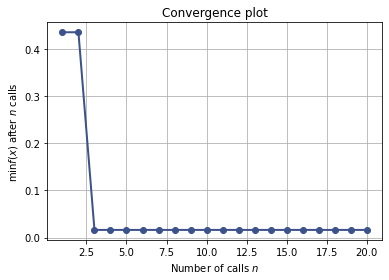

In [327]:
# re-training the final model on the full dataset to identify the selected features    

# filter the features of the entire dataset
X_df_filtered_svm_b, filtered_gene_codes_svm_b = filter_features_final(X_df_no75, labels_no75, 250)

# extract coefficients based on model type
final_svm_b, best_C_b = train_svm_baysian(X_df_filtered_svm_b, labels_no75, 10)


In [331]:
with open('svm_b_final_model.pkl', 'wb') as f:
    pickle.dump([X_df_filtered_svm_b, filtered_gene_codes_svm_b, final_svm_b, best_C_b], f)

In [342]:
#with open('svm_b_final_model.pkl', 'rb') as f:
#    X_df_filtered_svm_b, filtered_gene_codes_svm_b, final_svm_b, best_C_b = pickle.load(f)

In [328]:
# extract coefficients following RFE

selected_features_svm_b = final_svm_b.named_steps['feature_elim'].support_

selected_gene_list_svm_b = list(zip(filtered_gene_codes_svm_b, selected_features_svm_b))

selected_gene_codes_svm_b = []
for gene in selected_gene_list_svm_b:
    if gene[1] == True:
        selected_gene_codes_svm_b.append(gene[0])

# identify common gene codes
selected_gene_svm_b_df = gene_df[gene_df['Probe_Id'].isin(selected_gene_codes_svm_b)].iloc[:, np.r_[14, 5]]
selected_gene_codes_common_svm_b = list(selected_gene_svm_b_df.iloc[:,1])

# coefficients of the selected features
selected_gene_coefficients_svm_b = final_svm_b.named_steps['clf'].coef_[0]
selected_gene_svm_b_df['Coefs'] = selected_gene_coefficients_svm_b
print(selected_gene_svm_b_df)
selected_gene_svm_b_final = list(zip(selected_gene_codes_common_svm_b, selected_gene_coefficients_svm_b))
selected_gene_svm_b_final = sorted(selected_gene_svm_b_final, key = lambda x: x[1])

print(selected_gene_svm_b_final)

           Probe_Id ILMN_Gene     Coefs
5415   ILMN_1781700    IL18R1  0.245701
11732  ILMN_1683817    UBE2Q2 -0.285381
14902  ILMN_2285817    FAM89A  0.186256
20606  ILMN_1732296       ID3 -0.269280
23741  ILMN_1672660       MBP -0.227880
30201  ILMN_1703412     LATS2  0.300689
41917  ILMN_2228180      MSRA -0.033098
44671  ILMN_1671766       F12  0.175031
44726  ILMN_1780368     GPR18 -0.243508
47654  ILMN_1758529     P2RX1  0.218856
[('UBE2Q2', -0.2853814905625886), ('ID3', -0.2692795505276452), ('GPR18', -0.2435076239886987), ('MBP', -0.22787963943264863), ('MSRA', -0.03309758197526531), ('F12', 0.17503061787761132), ('FAM89A', 0.18625608349427406), ('P2RX1', 0.2188563709342086), ('IL18R1', 0.24570138002209205), ('LATS2', 0.30068930774836233)]


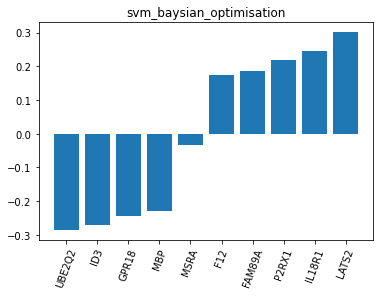

In [329]:
plot_genes(selected_gene_svm_b_final, model='svm_baysian_optimisation')

### [Not used] SVM using grid search over C and number of features, with RFE

In [924]:
# support vector machine nested cross validation. The inner loop is a manual grid search over hyper parameters
# C and the number of features to select in the RFE

def nested_cv_svm(df, labels, n_repeats):
    '''dataframe, labels, integer -> lists of scores, best hyper parameters, selected features, mis-classified points
    
    This function implements a nested cross validation. The outer loop is a repeated k fold, that creates multiple
    alternative train / test splits. The inner loop performs hyper parameter optimisation and feature selection using
    recursive feature elimination using an SVM model.
    '''
    
    # configure the cross-validation procedure
    cv_outer = RepeatedKFold(n_splits=3, n_repeats=n_repeats)

    # lists to collect scores from each outer fold
    scores_list = []
    best_parameters_list = []
    mis_classified_list = []

    # create inner loop for hyper parameter optimisation
    for train_ix, test_ix in cv_outer.split(df):

        # split data
        X_train, X_test = df.iloc[train_ix, :], df.iloc[test_ix, :]
        y_train, y_test = labels[train_ix], labels[test_ix]
        
        # implement univariate feature selection
        X_train, X_test = filter_features(X_train, y_train, X_test, 150)

        # train and fit the model
        model, best_C, best_f = train_svm(X_train, y_train)
        
        # model predictions on the test set
        y_pred = model.predict(X_test)
        y_pred_probab = model.predict_proba(X_test)

        # evaluate the model
        scores = score_model(y_pred, y_pred_probab, y_test)
        mis_classified = mis_class_points(X_test, y_pred, y_test)

        # add scores to lists
        scores_list.append(scores)
        best_parameters_list.append((best_C, best_f))
        mis_classified_list.append(mis_classified)

    return scores_list, best_parameters_list, mis_classified_list


def train_svm(X_train, y_train):

    # define pipeline and perform search
    param_grid = {'C': [0.01, 0.1, 1.0, 10, 100], 'f': [5, 10, 20]}
    cv_inner = loocv

    cv_res= []

    for param in ParameterGrid(param_grid):

        y_val_classes = []
        y_val_predictions = []
        for train_index, val_index in cv_inner.split(X_train):

            X_train_inner, X_val = X_train.iloc[train_index, :], X_train.iloc[val_index, :]
            y_train_inner, y_val = y_train[train_index], y_train[val_index]                

            # define the rfe proceedure
            svc = SVC(kernel="linear", C=param['C'], probability=True)        
            rfe = RFE(estimator=svc, n_features_to_select=param['f'], step=10)
            pipe = Pipeline(steps=[('rfe', rfe),
                                   ('clf', svc)])
            pipe.fit(X_train_inner, y_train_inner)

            y_val_pred = pipe.predict(X_val)
            y_val_classes.append(y_val)
            y_val_predictions.append(y_val_pred)

        score = accuracy_score(y_val_classes, y_val_predictions)
        print('Parameters:'+str(param)+'  Score:'+str(score))
        cv_res.append([param['C'], param['f'], score])

    cv_res = np.asarray(cv_res)    
    best_C = cv_res[np.argmax(cv_res[:,2])][0]
    best_f = int(cv_res[np.argmax(cv_res[:,2])][1])
    print('Best C:  '+str(best_C)+',   Best f:  '+str(best_f))

    # retrain the model with optimum hyper parameters
    clf = SVC(kernel="linear", C=best_C, probability=True)        
    feature_elim = RFE(estimator=clf, n_features_to_select=best_f, step=10)
    model = Pipeline(steps=[('feature_elim', feature_elim),
                           ('clf', clf)])
    model.fit(X_train, y_train)
    
    return model, best_C, best_f

In [ ]:
# run model with test data and print results

# scores_svm_red, best_parameters_svm_red, mis_classified_svm_red = nested_cv_svm(X_df_red, labels, 1)
print('The results for svm with test examples:')
print(scores_svm_red)
print(best_parameters_svm_red)
print(np.mean(np.asarray(scores_svm_red), axis=0))
print(mis_classified_svm_red)


In [925]:
# run nested cross validation on test data set, and print results

scores_svm, best_parameters_svm, mis_classified_svm = nested_cv_svm(X_df, labels, 3)
scores_svm_no75, best_parameters_svm_no75, mis_classified_svm_no75 = nested_cv_svm(X_df_no75, labels_no75, 3)

print('The results for svm with all 63 examples:')
print(scores_svm)
print(best_parameters_svm)
print(np.mean(np.asarray(scores_svm), axis=0))
print(mis_classified_svm)

print('The results for svm without patient 75:')
print(scores_svm_no75)
print(best_parameters_svm_no75)
print(np.mean(np.asarray(scores_svm_no75), axis=0))
print(mis_classified_svm_no75)

Parameters:{'C': 0.01, 'f': 5}  Score:0.9761904761904762
Parameters:{'C': 0.01, 'f': 10}  Score:0.9523809523809523
Parameters:{'C': 0.01, 'f': 20}  Score:0.9523809523809523
Parameters:{'C': 0.1, 'f': 5}  Score:0.9523809523809523
Parameters:{'C': 0.1, 'f': 10}  Score:0.9523809523809523
Parameters:{'C': 0.1, 'f': 20}  Score:0.9523809523809523
Parameters:{'C': 1.0, 'f': 5}  Score:0.9285714285714286
Parameters:{'C': 1.0, 'f': 10}  Score:0.9523809523809523
Parameters:{'C': 1.0, 'f': 20}  Score:0.9523809523809523
Parameters:{'C': 10, 'f': 5}  Score:0.9285714285714286
Parameters:{'C': 10, 'f': 10}  Score:0.9523809523809523
Parameters:{'C': 10, 'f': 20}  Score:0.9523809523809523
Parameters:{'C': 100, 'f': 5}  Score:0.9285714285714286
Parameters:{'C': 100, 'f': 10}  Score:0.9523809523809523
Parameters:{'C': 100, 'f': 20}  Score:0.9523809523809523
Best C:  0.01,   Best f:  5
Parameters:{'C': 0.01, 'f': 5}  Score:0.9761904761904762
Parameters:{'C': 0.01, 'f': 10}  Score:1.0
Parameters:{'C': 0.01,

Parameters:{'C': 10, 'f': 20}  Score:1.0
Parameters:{'C': 100, 'f': 5}  Score:1.0
Parameters:{'C': 100, 'f': 10}  Score:1.0
Parameters:{'C': 100, 'f': 20}  Score:1.0
Best C:  0.01,   Best f:  5
Parameters:{'C': 0.01, 'f': 5}  Score:0.926829268292683
Parameters:{'C': 0.01, 'f': 10}  Score:0.9512195121951219
Parameters:{'C': 0.01, 'f': 20}  Score:0.9512195121951219
Parameters:{'C': 0.1, 'f': 5}  Score:0.975609756097561
Parameters:{'C': 0.1, 'f': 10}  Score:0.975609756097561
Parameters:{'C': 0.1, 'f': 20}  Score:0.975609756097561
Parameters:{'C': 1.0, 'f': 5}  Score:0.975609756097561
Parameters:{'C': 1.0, 'f': 10}  Score:0.975609756097561
Parameters:{'C': 1.0, 'f': 20}  Score:0.975609756097561
Parameters:{'C': 10, 'f': 5}  Score:0.975609756097561
Parameters:{'C': 10, 'f': 10}  Score:0.975609756097561
Parameters:{'C': 10, 'f': 20}  Score:0.975609756097561
Parameters:{'C': 100, 'f': 5}  Score:0.975609756097561
Parameters:{'C': 100, 'f': 10}  Score:0.975609756097561
Parameters:{'C': 100, 'f'

In [936]:
# saving down results of the model
import pickle

with open('svm_results.pkl', 'wb') as f:
    pickle.dump([scores_svm, best_parameters_svm, mis_classified_svm], f)

with open('svm_results_no75.pkl', 'wb') as f:
    pickle.dump([scores_svm_no75, best_parameters_svm_no75, mis_classified_svm_no75], f)
    

In [ ]:
#with open('svm_results.pkl', 'rb') as f:
#    scores_svm, best_parameters_svm, mis_classified_svm = pickle.load(f)

#with open('svm_results_no75.pkl', 'rb') as f:
 #   scores_svm_no75, best_parameters_svm_no75, mis_classified_svm_no75 = pickle.load(f)

In [939]:
# re-training the final model on the full dataset to identify the selected features    

# filter the features of the entire dataset
X_df_filtered_svm_gs, filtered_gene_codes_svm_gs = filter_features_final(X_df, labels, 150)

# train on the full dataset
final_svm_gs, best_C, best_f = train_svm(X_df_filtered_svm_gs, labels)

with open('svm_gs_final_model.pkl', 'wb') as f:
    pickle.dump([X_df_filtered_svm_gs, filtered_gene_codes_svm_gs, final_svm_gs, best_C, best_f], f)

Parameters:{'C': 0.01, 'f': 5}  Score:0.9523809523809523
Parameters:{'C': 0.01, 'f': 10}  Score:0.9682539682539683
Parameters:{'C': 0.01, 'f': 20}  Score:0.9682539682539683
Parameters:{'C': 0.1, 'f': 5}  Score:0.9523809523809523
Parameters:{'C': 0.1, 'f': 10}  Score:0.9682539682539683
Parameters:{'C': 0.1, 'f': 20}  Score:0.9523809523809523
Parameters:{'C': 1.0, 'f': 5}  Score:0.9523809523809523
Parameters:{'C': 1.0, 'f': 10}  Score:0.9682539682539683
Parameters:{'C': 1.0, 'f': 20}  Score:0.9523809523809523
Parameters:{'C': 10, 'f': 5}  Score:0.9523809523809523
Parameters:{'C': 10, 'f': 10}  Score:0.9682539682539683
Parameters:{'C': 10, 'f': 20}  Score:0.9523809523809523
Parameters:{'C': 100, 'f': 5}  Score:0.9523809523809523
Parameters:{'C': 100, 'f': 10}  Score:0.9682539682539683
Parameters:{'C': 100, 'f': 20}  Score:0.9523809523809523
Best C:  0.01,   Best f:  10


In [341]:
with open('svm_gs_final_model.pkl', 'rb') as f:
    X_df_filtered_svm_gs, filtered_gene_codes_svm_gs, final_svm_gs, best_C, best_f = pickle.load(f)

In [965]:
# extract coefficients following RFE

selected_features_svm_gs = final_svm_gs.named_steps['feature_elim'].support_

selected_gene_list_svm_gs = list(zip(filtered_gene_codes_svm_gs, selected_features_svm_gs))

selected_gene_codes_svm_gs = []
for gene in selected_gene_list_svm_gs:
    if gene[1] == True:
        selected_gene_codes_svm_gs.append(gene[0])


# identify common gene codes
selected_gene_svm_gs_df = gene_df[gene_df['Probe_Id'].isin(selected_gene_codes_svm_gs)].iloc[:, np.r_[14, 5]]
selected_gene_codes_common_svm_gs = list(selected_gene_svm_gs_df.iloc[:,1])

# coefficients of the selected features
selected_gene_coefficients_svm_gs = final_svm_gs.named_steps['clf'].coef_[0]
selected_gene_svm_gs_df['Coefs'] = selected_gene_coefficients_svm_gs
print(selected_gene_svm_gs_df)
selected_gene_svm_gs_final = list(zip(selected_gene_codes_common_svm_gs, selected_gene_coefficients_svm_gs))
selected_gene_svm_gs_final = sorted(selected_gene_svm_gs_final, key = lambda x: x[1])

print(selected_gene_svm_gs_final)

           Probe_Id  ILMN_Gene     Coefs
11732  ILMN_1683817     UBE2Q2 -0.149364
13839  ILMN_2082209  C20ORF100 -0.138169
15634  ILMN_1691402  LOC644162 -0.132727
20606  ILMN_1732296        ID3 -0.129401
33119  ILMN_1801043        GSN  0.134594
34814  ILMN_2306540      PDE9A -0.130131
38198  ILMN_1738955  C10ORF104 -0.117591
39676  ILMN_2302757      FCGBP -0.135498
44671  ILMN_1671766        F12  0.103706
47762  ILMN_1773650      LRRN3 -0.121742
[('UBE2Q2', -0.14936438511381073), ('C20ORF100', -0.13816943546437555), ('FCGBP', -0.13549837626508113), ('LOC644162', -0.13272651963985427), ('PDE9A', -0.13013053259341645), ('ID3', -0.1294008586870879), ('LRRN3', -0.12174168109569895), ('C10ORF104', -0.11759081105359853), ('F12', 0.1037055408952131), ('GSN', 0.13459421316385378)]


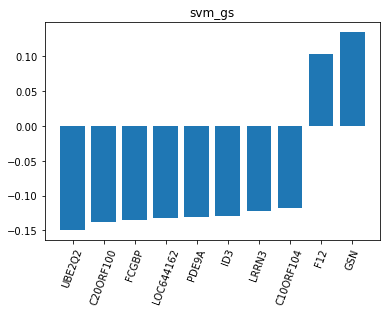

In [966]:
plot_genes(selected_gene_svm_gs_final, model='svm_grid_search')

### Classifier 3: Random Forest

- Random Forest / Tree based models have intrinsic feature selection built in (read up)
- ref: https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/
- ref: https://www.researchgate.net/profile/Shuzlina-Rahman/publication/322920304_Feature_selection_methods_Case_of_filter_and_wrapper_approaches_for_maximising_classification_accuracy/links/5eb17fa545851592d6b9b50c/Feature-selection-methods-Case-of-filter-and-wrapper-approaches-for-maximising-classification-accuracy.pdf?origin=publication_detail
- Improved by using full feature set and setting max_features for each tree - randomised search over number of estimators and the max features
- Ran model through the nested CV and averaged the results
- Extracted the feature importances from the resulting model, for comparison with other models

### RF - using grid search over hyper parameters, and OOB scoring for validation

In [337]:
# Grid search - implemented manually for Random Forest hyper parameter optimisation

from sklearn.model_selection import ParameterGrid, RepeatedKFold
from sklearn.ensemble import RandomForestClassifier

def nested_cv_rf_oob(df, labels, n_repeats):
    '''dataframe, labels, integer -> lists of scores, best hyper parameters, selected features, mis-classified points
    
    This function implements a nested cross validation. The outer loop is a repeated k fold, that creates multiple
    alternative train / test splits. The inner loop performs hyper parameter optimisation and feature selection using
    recursive feature elimination using an SVM model.
    '''
    
    # configure the cross-validation procedure
    cv_outer = RepeatedKFold(n_splits=3, n_repeats=n_repeats)

    # lists to collect scores from each outer fold
    scores_list = []
    best_parameters_list = []
    mis_classified_list = []

    # create inner loop for hyper parameter optimisation
    for train_ix, test_ix in cv_outer.split(df):

        # split data
        X_train, X_test = df.iloc[train_ix, :], df.iloc[test_ix, :]
        y_train, y_test = labels[train_ix], labels[test_ix]

        # train and fit the model
        model, best_n_estimators, best_max_features = train_rf_oob(X_train, y_train)
        
        # model predictions on the test set
        y_pred = model.predict(X_test)
        y_pred_probab = model.predict_proba(X_test)

        # evaluate the model
        scores = score_model(y_pred, y_pred_probab, y_test)
        mis_classified = mis_class_points(X_test, y_pred, y_test)

        # add scores to lists
        scores_list.append(scores)
        best_parameters_list.append((best_n_estimators, best_max_features))
        mis_classified_list.append(mis_classified)

    return scores_list, best_parameters_list, mis_classified_list


def train_rf_oob(X_train, y_train):

    # define pipeline and perform search
    n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]  # originally this was num=20
    max_features = [int(x) for x in np.linspace(start = 100, stop = 100, num = 2)]   # change to 1000 for real dataset
    param_grid = {'n_estimators': n_estimators,
                   'max_features': max_features
                   }
    
    cv_res= []

    for param in ParameterGrid(param_grid):

        # fit model
        rf_clf = RandomForestClassifier(oob_score = True)
        rf_clf.set_params(**param)
        rf_clf.fit(X_train, y_train)

        score = rf_clf.oob_score_
        print('Parameters:'+str(param)+'  Score:'+str(score))
        cv_res.append([param['n_estimators'], param['max_features'], score])

    cv_res = np.asarray(cv_res)    
    best_n_estimators = int(cv_res[np.argmax(cv_res[:,2])][0])
    best_max_features = int(cv_res[np.argmax(cv_res[:,2])][1])
    print('Best no. estimators:  '+str(best_n_estimators)+',   Best max features:  '+str(best_max_features))

    # retrain the model with optimum hyper parameters
    model = RandomForestClassifier(n_estimators=best_n_estimators, max_features=best_max_features)        
    model.fit(X_train, y_train)

    return model, best_n_estimators, best_max_features


In [455]:
# train models on test data and print results

# copy of functions

from sklearn.model_selection import ParameterGrid, RepeatedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

def nested_cv_rf_oob(df, labels, n_repeats, n_features):
    '''dataframe, labels, integer -> lists of scores, best hyper parameters, selected features, mis-classified points
    
    This function implements a nested cross validation. The outer loop is a repeated k fold, that creates multiple
    alternative train / test splits. The inner loop performs hyper parameter optimisation and feature selection using
    using by scoring out of bag examples.
    '''
    
    # configure the cross-validation procedure
    cv_outer = RepeatedKFold(n_splits=3, n_repeats=n_repeats)

    # lists to collect scores from each outer fold
    scores_list = []
    best_parameters_list = []
    mis_classified_list = []
    num_features_list = []

    # create inner loop for hyper parameter optimisation
    for train_ix, test_ix in cv_outer.split(df):

        # split data
        X_train, X_test = df.iloc[train_ix, :], df.iloc[test_ix, :]
        y_train, y_test = labels[train_ix], labels[test_ix]

        # train and fit the model
        model, best_n_estimators, best_max_features, num_features = train_rf_oob(X_train, y_train, n_features)
        
        # model predictions on the test set
        y_pred = model.predict(X_test)
        y_pred_probab = model.predict_proba(X_test)

        # evaluate the model
        scores = score_model(y_pred, y_pred_probab, y_test)
        mis_classified = mis_class_points(X_test, y_pred, y_test)

        # add scores to lists
        scores_list.append(scores)
        best_parameters_list.append((best_n_estimators, best_max_features))
        mis_classified_list.append(mis_classified)
        num_features_list.append(num_features)

    return scores_list, best_parameters_list, mis_classified_list, num_features_list


def train_rf_oob(X_train, y_train, n_features):

    # define pipeline and perform search
    n_estimators = [int(x) for x in [500, 1000]]  # n_estimators large since low sample size
    max_features = [100, 200, 500]
    param_grid = {'n_estimators': n_estimators,
                   'max_features': max_features
                   }
    
    cv_res= []

    for param in ParameterGrid(param_grid):

        # fit model      
        rf_clf_select = RandomForestClassifier()
        rf_clf_select.set_params(**param)
        rf_clf = RandomForestClassifier(n_estimators=1000, max_features=None, oob_score = True)
        rf_select = SelectFromModel(rf_clf_select, max_features=n_features, threshold=-np.inf)
        pipe = Pipeline(steps=[('select', rf_select),
                               ('clf', rf_clf)])
        
        pipe.fit(X_train, y_train)

        score = pipe.named_steps['clf'].oob_score_
        print('Parameters:'+str(param)+'  Score:'+str(score))
        cv_res.append([param['n_estimators'], param['max_features'], score])

    cv_res = np.asarray(cv_res)    
    best_n_estimators = int(cv_res[np.argmax(cv_res[:,2])][0])
    best_max_features = int(cv_res[np.argmax(cv_res[:,2])][1])

    # retrain the model with optimum hyper parameters
    rf_clf_select = RandomForestClassifier(n_estimators=best_n_estimators, max_features=best_max_features) 
    rf_clf = RandomForestClassifier(n_estimators=best_n_estimators, max_features=None, oob_score = True)
    rf_select = SelectFromModel(rf_clf_select, max_features=n_features, threshold=-np.inf)
    model = Pipeline(steps=[('select', rf_select),
                            ('clf', rf_clf)])
    model.fit(X_train, y_train)
    num_features = len(model.named_steps['select'].get_support(indices=True))
    
    print('Best no. estimators:  '+str(best_n_estimators)+
          ',    Best max features:  '+str(best_max_features)+
          ',    Number of features:  '+str(n_features))

    return model, best_n_estimators, best_max_features, num_features

In [457]:
# run model on test dataset and print results
# scores_rf_oob_test, best_parameters_rf_oob_test, mis_classified_rf_oob_test, features_rf_oob_test = nested_cv_rf_oob(X_df_red, labels, 1, 20)

#print('The results for rf_oob with the test dataset:')
#print(scores_rf_oob_test)
#print(best_parameters_rf_oob_test)
#print(np.mean(np.asarray(scores_rf_oob_test), axis=0))
#print(mis_classified_rf_oob_test)
#print(features_rf_oob_test)

In [456]:
#scores_rf_oob, best_parameters_rf_oob, mis_classified_rf_oob = nested_cv_rf_oob(X_df, labels, 3)

# train the model with the full dataset, for 20 featurs
scores_rf_no75_oob5,  best_parameters_rf_no75_oob5,  mis_classified_rf_no75_oob5,  features_rf_no75_oob5  = nested_cv_rf_oob(X_df_no75, labels_no75, 3, 5)
scores_rf_no75_oob10, best_parameters_rf_no75_oob10, mis_classified_rf_no75_oob10, features_rf_no75_oob10 = nested_cv_rf_oob(X_df_no75, labels_no75, 3, 10)
scores_rf_no75_oob15, best_parameters_rf_no75_oob15, mis_classified_rf_no75_oob15, features_rf_no75_oob15 = nested_cv_rf_oob(X_df_no75, labels_no75, 3, 15)
scores_rf_no75_oob20, best_parameters_rf_no75_oob20, mis_classified_rf_no75_oob20, features_rf_no75_oob20 = nested_cv_rf_oob(X_df_no75, labels_no75, 3, 20)
scores_rf_no75_oob30, best_parameters_rf_no75_oob30, mis_classified_rf_no75_oob30, features_rf_no75_oob30 = nested_cv_rf_oob(X_df_no75, labels_no75, 3, 30)


Parameters:{'max_features': 100, 'n_estimators': 500}  Score:1.0
Parameters:{'max_features': 100, 'n_estimators': 1000}  Score:0.975609756097561
Parameters:{'max_features': 200, 'n_estimators': 500}  Score:1.0
Parameters:{'max_features': 200, 'n_estimators': 1000}  Score:1.0
Parameters:{'max_features': 500, 'n_estimators': 500}  Score:1.0
Parameters:{'max_features': 500, 'n_estimators': 1000}  Score:1.0
Best no. estimators:  500,    Best max features:  100,    Number of features:  5
Parameters:{'max_features': 100, 'n_estimators': 500}  Score:1.0
Parameters:{'max_features': 100, 'n_estimators': 1000}  Score:0.9512195121951219
Parameters:{'max_features': 200, 'n_estimators': 500}  Score:1.0
Parameters:{'max_features': 200, 'n_estimators': 1000}  Score:1.0
Parameters:{'max_features': 500, 'n_estimators': 500}  Score:1.0
Parameters:{'max_features': 500, 'n_estimators': 1000}  Score:1.0
Best no. estimators:  500,    Best max features:  100,    Number of features:  5
Parameters:{'max_featur

Parameters:{'max_features': 500, 'n_estimators': 500}  Score:1.0
Parameters:{'max_features': 500, 'n_estimators': 1000}  Score:1.0
Best no. estimators:  500,    Best max features:  200,    Number of features:  10
Parameters:{'max_features': 100, 'n_estimators': 500}  Score:1.0
Parameters:{'max_features': 100, 'n_estimators': 1000}  Score:0.9761904761904762
Parameters:{'max_features': 200, 'n_estimators': 500}  Score:1.0
Parameters:{'max_features': 200, 'n_estimators': 1000}  Score:0.9761904761904762
Parameters:{'max_features': 500, 'n_estimators': 500}  Score:1.0
Parameters:{'max_features': 500, 'n_estimators': 1000}  Score:1.0
Best no. estimators:  500,    Best max features:  100,    Number of features:  10
Parameters:{'max_features': 100, 'n_estimators': 500}  Score:0.975609756097561
Parameters:{'max_features': 100, 'n_estimators': 1000}  Score:1.0
Parameters:{'max_features': 200, 'n_estimators': 500}  Score:1.0
Parameters:{'max_features': 200, 'n_estimators': 1000}  Score:1.0
Parame

Parameters:{'max_features': 500, 'n_estimators': 500}  Score:1.0
Parameters:{'max_features': 500, 'n_estimators': 1000}  Score:1.0
Best no. estimators:  500,    Best max features:  100,    Number of features:  20
Parameters:{'max_features': 100, 'n_estimators': 500}  Score:1.0
Parameters:{'max_features': 100, 'n_estimators': 1000}  Score:1.0
Parameters:{'max_features': 200, 'n_estimators': 500}  Score:1.0
Parameters:{'max_features': 200, 'n_estimators': 1000}  Score:1.0
Parameters:{'max_features': 500, 'n_estimators': 500}  Score:1.0
Parameters:{'max_features': 500, 'n_estimators': 1000}  Score:1.0
Best no. estimators:  500,    Best max features:  100,    Number of features:  20
Parameters:{'max_features': 100, 'n_estimators': 500}  Score:1.0
Parameters:{'max_features': 100, 'n_estimators': 1000}  Score:1.0
Parameters:{'max_features': 200, 'n_estimators': 500}  Score:1.0
Parameters:{'max_features': 200, 'n_estimators': 1000}  Score:1.0
Parameters:{'max_features': 500, 'n_estimators': 5

In [441]:
# print results for full dataset

#print('The results for rf_oob with all 63 examples:')
#print(scores_rf_oob)
#print(best_parameters_rf_oob)
#print(np.mean(np.asarray(scores_rf_oob), axis=0))
#print(mis_classified_rf_oob)

print('The results for rf_oob without patient 75:')
print(scores_rf_no75_oob)
print(best_parameters_rf_no75_oob)
print(np.mean(np.asarray(scores_rf_no75_oob), axis=0))
print(mis_classified_rf_no75_oob)
print(features_rf_no75_oob)

The results for rf_oob without patient 75:
[(1.0, 1.0, 1.0, 1.0, 1.0), (0.9, 0.88, 0.92, 0.88, 0.98), (1.0, 1.0, 1.0, 1.0, 1.0), (0.95, 0.88, 1.0, 1.0, 1.0), (1.0, 1.0, 1.0, 1.0, 1.0), (1.0, 1.0, 1.0, 1.0, 1.0), (1.0, 1.0, 1.0, 1.0, 1.0), (0.95, 0.91, 1.0, 1.0, 1.0), (0.95, 1.0, 0.93, 0.83, 1.0)]
[(500, 100), (500, 100), (500, 100), (500, 100), (500, 100), (500, 100), (1000, 100), (500, 100), (500, 100)]
[0.97222222 0.96333333 0.98333333 0.96777778 0.99777778]
[{}, {'Con_165a': 'fp', 'Inf_149': 'fn'}, {}, {'Inf_149': 'fn'}, {}, {}, {}, {'Inf_149': 'fn'}, {'Con_165a': 'fp'}]
[20, 20, 20, 20, 20, 20, 20, 20, 20]


In [442]:
# function to convert svm results to dataframe:

def rf_results_df(scores, parameters, misclassified):
    mean_scores = np.mean(np.asarray(scores), axis=0)
    array = np.array(scores)
    array = np.vstack((array, mean_scores))
    array = pd.DataFrame(array, index = [1, 2, 3, 4, 5, 6, 7, 8, 9, 'Total'], columns = ['Accuracy', 'Recall', 'Specificity', 'Precision', 'AUC'])
    array = array.round(2)
    
    # create columns for parameters
    n_est = []
    max_feat = []
    for p in parameters:
        n_est.append(p[0])
        max_feat.append(p[1])
    n_est.append('n/a')
    max_feat.append('n/a')
    array.insert(0, 'Max Features', max_feat) 
    array.insert(0, '# Estimators', n_est)

    
    # create columns for false positives and false negatives
    fp_column = []
    fn_column = []
    for i in misclassified:
        fps = []
        fns = []
        for key, val in i.items():
            if val == 'fp':
                fps.append(key)
            if val == 'fn':
                fns.append(key)
        fp_column.append(fps)
        fn_column.append(fns)
    fp_column.append('n/a')
    fn_column.append('n/a')
    array.insert(7, 'False Positives', fp_column)
    array.insert(8, 'False Negatives', fn_column) 
    
    return array

In [458]:
# restults dataframes
rf_results_df_no75_5 = rf_results_df(scores_rf_no75_oob5, best_parameters_rf_no75_oob5, mis_classified_rf_no75_oob5)
rf_results_df_no75_10 = rf_results_df(scores_rf_no75_oob10, best_parameters_rf_no75_oob10, mis_classified_rf_no75_oob10)
rf_results_df_no75_15 = rf_results_df(scores_rf_no75_oob15, best_parameters_rf_no75_oob15, mis_classified_rf_no75_oob15)
rf_results_df_no75_20 = rf_results_df(scores_rf_no75_oob20, best_parameters_rf_no75_oob20, mis_classified_rf_no75_oob20)
rf_results_df_no75_30 = rf_results_df(scores_rf_no75_oob30, best_parameters_rf_no75_oob30, mis_classified_rf_no75_oob30)

In [460]:
rf_results_df_no75_5

,# Estimators,Max Features,Accuracy,Recall,Specificity,Precision,AUC,False Positives,False Negatives
1,500,100,0.86,1.00,0.77,0.73,0.96,"[Con_087a, Con_165a, Con_181a]",[]
2,500,100,0.95,0.90,1.00,1.00,1.00,[],[Inf_132a]
3,500,200,0.90,0.78,1.00,1.00,0.99,[],"[Inf_116, Inf_149]"
4,500,100,0.90,1.00,0.86,0.78,1.00,"[Con_069, Con_096a]",[]
5,1000,100,0.95,0.92,1.00,1.00,1.00,[],[Inf_116]
6,500,100,0.95,1.00,0.92,0.88,0.97,[Con_165a],[]
7,1000,200,1.00,1.00,1.00,1.00,1.00,[],[]
8,500,100,0.86,0.78,0.92,0.88,0.98,[Con_079],"[Inf_132a, Inf_149]"
9,1000,200,1.00,1.00,1.00,1.00,1.00,[],[]
Total,n/a,n/a,0.93,0.93,0.94,0.92,0.99,n/a,n/a


In [462]:
rf_results_df_no75_10

,# Estimators,Max Features,Accuracy,Recall,Specificity,Precision,AUC,False Positives,False Negatives
1,500,200,1.00,1.00,1.00,1.00,1.00,[],[]
2,500,100,0.95,0.90,1.00,1.00,0.99,[],[Inf_149]
3,500,100,0.95,1.00,0.93,0.83,1.00,[Con_165a],[]
4,500,100,0.95,0.91,1.00,1.00,1.00,[],[Inf_149]
5,500,100,1.00,1.00,1.00,1.00,1.00,[],[]
6,500,100,0.85,1.00,0.77,0.70,1.00,"[Con_079, Con_165a, Con_206]",[]
7,500,100,0.95,0.90,1.00,1.00,0.98,[],[Inf_149]
8,500,200,1.00,1.00,1.00,1.00,1.00,[],[]
9,500,100,1.00,1.00,1.00,1.00,1.00,[],[]
Total,n/a,n/a,0.96,0.97,0.97,0.95,1.00,n/a,n/a


In [463]:
rf_results_df_no75_15

,# Estimators,Max Features,Accuracy,Recall,Specificity,Precision,AUC,False Positives,False Negatives
1,1000,100,1.00,1.00,1.00,1.00,1.00,[],[]
2,500,100,0.95,0.92,1.00,1.00,0.99,[],[Inf_149]
3,500,100,0.95,0.86,1.00,1.00,0.99,[],[Inf_114]
4,500,100,1.00,1.00,1.00,1.00,1.00,[],[]
5,500,100,0.90,0.80,1.00,1.00,0.98,[],"[Inf_114, Inf_149]"
6,500,100,1.00,1.00,1.00,1.00,1.00,[],[]
7,1000,100,0.95,1.00,0.90,0.92,0.98,[Con_165a],[]
8,500,100,0.95,0.88,1.00,1.00,1.00,[],[Inf_149]
9,500,100,1.00,1.00,1.00,1.00,1.00,[],[]
Total,n/a,n/a,0.97,0.94,0.99,0.99,0.99,n/a,n/a


In [464]:
rf_results_df_no75_20

,# Estimators,Max Features,Accuracy,Recall,Specificity,Precision,AUC,False Positives,False Negatives
1,500,100,0.95,0.83,1.00,1.00,1.00,[],[Inf_149]
2,500,100,0.95,1.00,0.89,0.92,1.00,[Con_165a],[]
3,500,100,1.00,1.00,1.00,1.00,1.00,[],[]
4,500,100,1.00,1.00,1.00,1.00,1.00,[],[]
5,500,200,1.00,1.00,1.00,1.00,1.00,[],[]
6,500,100,1.00,1.00,1.00,1.00,1.00,[],[]
7,500,100,0.95,0.91,1.00,1.00,0.98,[],[Inf_149]
8,500,100,1.00,1.00,1.00,1.00,1.00,[],[]
9,500,100,1.00,1.00,1.00,1.00,1.00,[],[]
Total,n/a,n/a,0.98,0.97,0.99,0.99,1.00,n/a,n/a


In [465]:
rf_results_df_no75_30

,# Estimators,Max Features,Accuracy,Recall,Specificity,Precision,AUC,False Positives,False Negatives
1,500,100,1.00,1.00,1.00,1.00,1.00,[],[]
2,500,100,0.95,0.88,1.00,1.00,0.99,[],[Inf_149]
3,500,100,1.00,1.00,1.00,1.00,1.00,[],[]
4,500,100,0.90,0.92,0.89,0.92,0.99,[Con_165a],[Inf_149]
5,500,100,1.00,1.00,1.00,1.00,1.00,[],[]
6,500,100,1.00,1.00,1.00,1.00,1.00,[],[]
7,500,100,0.95,1.00,0.92,0.90,1.00,[Con_165a],[]
8,500,100,1.00,1.00,1.00,1.00,1.00,[],[]
9,500,100,0.85,0.62,1.00,1.00,1.00,[],"[Inf_114, Inf_116, Inf_149]"
Total,n/a,n/a,0.96,0.94,0.98,0.98,1.00,n/a,n/a


In [447]:
# retraining on the full dataset with the oob scored model using 5 features only - since performance was good

final_rf_oob, best_n_estimators_oob, best_max_features_oob, num_features_oob = train_rf_oob(X_df_no75, labels_no75, 20)

Parameters:{'max_features': 100, 'n_estimators': 500}  Score:1.0
Parameters:{'max_features': 100, 'n_estimators': 1000}  Score:1.0
Parameters:{'max_features': 150, 'n_estimators': 500}  Score:0.9516129032258065
Parameters:{'max_features': 150, 'n_estimators': 1000}  Score:1.0
Best no. estimators:  500,    Best max features:  100,    Number of features:  20


In [448]:
def select_genes_fi_pipeline(feature_mask, importances, dataset, gene_df):

    selected_gene_list = list(zip(dataset.columns, feature_mask))

    selected_gene_codes = []
    selected_gene_coefficients = []
    for gene in selected_gene_list:
        if gene[1] == True:
            selected_gene_codes.append(gene[0])

    # identify common gene codes
    selected_gene_df = gene_df[gene_df['Probe_Id'].isin(selected_gene_codes)].iloc[:, np.r_[14, 5]]
    selected_gene_codes_common = list(selected_gene_df.iloc[:,1])

    # combining gene codes with feature importances
    selected_gene_df['FI'] = importances
    
    # zip features importances with common names
    selected_gene_final = list(zip(selected_gene_codes_common, importances))
    selected_gene_final = sorted(selected_gene_final, key = lambda x: x[1])
    
    return selected_gene_final

In [451]:
# extracting features importances from pipeline steps
# coud use index=true in get_support() to cut down the code

# mask of features selected by SelectFromModel
selected_features_rf_oob_s = final_rf_oob.named_steps['select'].get_support()

# feature importances of the selected genes
feature_importance_rf_oob_s = final_rf_oob.named_steps['clf'].feature_importances_

selected_gene_rf_final_oob = select_genes_fi_pipeline(selected_features_rf_oob_s, feature_importance_rf_oob_s, X_df_no75, gene_df)
print('The number of selected genes is:  '+str(len(selected_gene_rf_final_oob)))

The number of selected genes is:  20


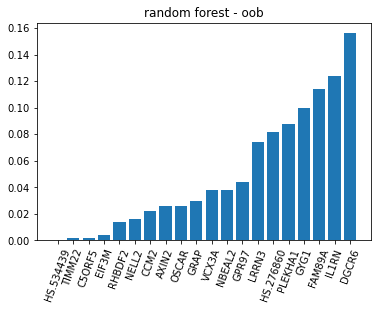

In [452]:
plot_genes(selected_gene_rf_final_oob, model='random forest - oob')

In [ ]:
# save down results with pickle

# saving down results of the model
import pickle

with open('rf_results_no75_oob.pkl', 'wb') as f:
    pickle.dump([scores_rf_no75_oob5,  best_parameters_rf_no75_oob5,  mis_classified_rf_no75_oob5,  features_rf_no75_oob5,
                 scores_rf_no75_oob10, best_parameters_rf_no75_oob10, mis_classified_rf_no75_oob10, features_rf_no75_oob10,
                 scores_rf_no75_oob15, best_parameters_rf_no75_oob15, mis_classified_rf_no75_oob15, features_rf_no75_oob15,
                 scores_rf_no75_oob20, best_parameters_rf_no75_oob20, mis_classified_rf_no75_oob20, features_rf_no75_oob20,
                 scores_rf_no75_oob30, best_parameters_rf_no75_oob30, mis_classified_rf_no75_oob30, features_rf_no75_oob30], f)


### RF - grid search hyper parameters using LOO cross validation inner loop

In [336]:
# Grid search - implemented manually for Random Forest hyper parameter optimisation

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut

def nested_cv_rf(df, labels, n_repeats):
    '''dataframe, labels, integer -> lists of scores, best hyper parameters, selected features, mis-classified points
    
    This function implements a nested cross validation. The outer loop is a repeated k fold, that creates multiple
    alternative train / test splits. The inner loop performs hyper parameter optimisation and feature selection using
    recursive feature elimination using an SVM model.
    '''
    
    # configure the cross-validation procedure
    cv_outer = RepeatedKFold(n_splits=3, n_repeats=n_repeats)

    # lists to collect scores from each outer fold
    scores_list = []
    best_parameters_list = []
    mis_classified_list = []

    # create inner loop for hyper parameter optimisation
    for train_ix, test_ix in cv_outer.split(df):

        # split data
        X_train, X_test = df.iloc[train_ix, :], df.iloc[test_ix, :]
        y_train, y_test = labels[train_ix], labels[test_ix]

        # train and fit the model
        model, best_n_estimators, best_max_features = train_rf(X_train, y_train)
        
        # model predictions on the test set
        y_pred = model.predict(X_test)
        y_pred_probab = model.predict_proba(X_test)

        # evaluate the model
        scores = score_model(y_pred, y_pred_probab, y_test)
        mis_classified = mis_class_points(X_test, y_pred, y_test)

        # add scores to lists
        scores_list.append(scores)
        best_parameters_list.append((best_n_estimators, best_max_features))
        mis_classified_list.append(mis_classified)

    return scores_list, best_parameters_list, mis_classified_list


def train_rf(X_train, y_train):

    # define pipeline and perform search
    n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 5)]  # originally this was num=20
    max_features = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 5)]
    param_grid = {'n_estimators': n_estimators,
                   'max_features': max_features
                   }
    
    cv_inner = loocv
    cv_res= []

    for param in ParameterGrid(param_grid):

        y_val_classes = []
        y_val_predictions = []
        for train_index, val_index in cv_inner.split(X_train):

            X_train_inner, X_val = X_train.iloc[train_index, :], X_train.iloc[val_index, :]
            y_train_inner, y_val = y_train[train_index], y_train[val_index]                

            # fit model
            rf_clf = RandomForestClassifier()
            rf_clf.set_params(**param)
            rf_clf.fit(X_train_inner, y_train_inner)

            # predict validation set
            y_val_pred = rf_clf.predict(X_val)
            y_val_classes.append(y_val)
            y_val_predictions.append(y_val_pred)

        score = accuracy_score(y_val_classes, y_val_predictions)
        print('Parameters:'+str(param)+'  Score:'+str(score))
        cv_res.append([param['n_estimators'], param['max_features'], score])

    cv_res = np.asarray(cv_res)    
    best_n_estimators = int(cv_res[np.argmax(cv_res[:,2])][0])
    best_max_features = int(cv_res[np.argmax(cv_res[:,2])][1])
    print('Best no. estimators:  '+str(best_n_estimators)+',   Best max features:  '+str(best_max_features))

    # retrain the model with optimum hyper parameters
    model = RandomForestClassifier(n_estimators=best_n_estimators, max_features=best_max_features)        
    model.fit(X_train, y_train)

    return model, best_n_estimators, best_max_features


In [931]:
#scores_rf_red, best_parameters_rf_red, mis_classified_rf_red = nested_cv_rf(X_df_red, labels, 1)
scores_rf, best_parameters_rf, mis_classified_rf = nested_cv_rf(X_df, labels, 3)
scores_rf_no75, best_parameters_rf_no75, mis_classified_rf_no75 = nested_cv_rf(X_df_no75, labels_no75, 3)

#print results
#print('The results for random forest with test data:')
#print(scores_rf_red)
#print(best_parameters_rf_red)
#print(np.mean(np.asarray(scores_rf_red), axis=0))
#print(mis_classified_rf_red)

print('The results for rf with all 63 examples:')
print(scores_rf)
print(best_parameters_rf)
print(np.mean(np.asarray(scores_rf), axis=0))
print(mis_classified_rf)

print('The results for rf without patient 75:')
print(scores_rf_no75)
print(best_parameters_rf_no75)
print(np.mean(np.asarray(scores_rf_no75), axis=0))
print(mis_classified_rf_no75)


Parameters:{'max_features': 100, 'n_estimators': 100}  Score:0.9523809523809523
Parameters:{'max_features': 100, 'n_estimators': 325}  Score:0.9523809523809523
Parameters:{'max_features': 100, 'n_estimators': 550}  Score:0.9523809523809523
Parameters:{'max_features': 100, 'n_estimators': 775}  Score:0.9285714285714286
Parameters:{'max_features': 100, 'n_estimators': 1000}  Score:0.9285714285714286
Parameters:{'max_features': 325, 'n_estimators': 100}  Score:0.9523809523809523
Parameters:{'max_features': 325, 'n_estimators': 325}  Score:0.9523809523809523
Parameters:{'max_features': 325, 'n_estimators': 550}  Score:0.9523809523809523
Parameters:{'max_features': 325, 'n_estimators': 775}  Score:0.9523809523809523
Parameters:{'max_features': 325, 'n_estimators': 1000}  Score:0.9523809523809523
Parameters:{'max_features': 550, 'n_estimators': 100}  Score:0.9523809523809523
Parameters:{'max_features': 550, 'n_estimators': 325}  Score:0.9523809523809523
Parameters:{'max_features': 550, 'n_es

Parameters:{'max_features': 100, 'n_estimators': 100}  Score:1.0
Parameters:{'max_features': 100, 'n_estimators': 325}  Score:1.0
Parameters:{'max_features': 100, 'n_estimators': 550}  Score:1.0
Parameters:{'max_features': 100, 'n_estimators': 775}  Score:1.0
Parameters:{'max_features': 100, 'n_estimators': 1000}  Score:1.0
Parameters:{'max_features': 325, 'n_estimators': 100}  Score:1.0
Parameters:{'max_features': 325, 'n_estimators': 325}  Score:1.0
Parameters:{'max_features': 325, 'n_estimators': 550}  Score:1.0
Parameters:{'max_features': 325, 'n_estimators': 775}  Score:1.0
Parameters:{'max_features': 325, 'n_estimators': 1000}  Score:1.0
Parameters:{'max_features': 550, 'n_estimators': 100}  Score:1.0
Parameters:{'max_features': 550, 'n_estimators': 325}  Score:1.0
Parameters:{'max_features': 550, 'n_estimators': 550}  Score:1.0
Parameters:{'max_features': 550, 'n_estimators': 775}  Score:1.0
Parameters:{'max_features': 550, 'n_estimators': 1000}  Score:1.0
Parameters:{'max_featu

Parameters:{'max_features': 325, 'n_estimators': 1000}  Score:0.9285714285714286
Parameters:{'max_features': 550, 'n_estimators': 100}  Score:0.9285714285714286
Parameters:{'max_features': 550, 'n_estimators': 325}  Score:0.9285714285714286
Parameters:{'max_features': 550, 'n_estimators': 550}  Score:0.9285714285714286
Parameters:{'max_features': 550, 'n_estimators': 775}  Score:0.9285714285714286
Parameters:{'max_features': 550, 'n_estimators': 1000}  Score:0.9047619047619048
Parameters:{'max_features': 775, 'n_estimators': 100}  Score:0.9285714285714286
Parameters:{'max_features': 775, 'n_estimators': 325}  Score:0.9523809523809523
Parameters:{'max_features': 775, 'n_estimators': 550}  Score:0.9285714285714286
Parameters:{'max_features': 775, 'n_estimators': 775}  Score:0.9285714285714286
Parameters:{'max_features': 775, 'n_estimators': 1000}  Score:0.9047619047619048
Parameters:{'max_features': 1000, 'n_estimators': 100}  Score:0.9285714285714286
Parameters:{'max_features': 1000, 'n

Parameters:{'max_features': 550, 'n_estimators': 775}  Score:0.9512195121951219
Parameters:{'max_features': 550, 'n_estimators': 1000}  Score:0.9512195121951219
Parameters:{'max_features': 775, 'n_estimators': 100}  Score:0.9512195121951219
Parameters:{'max_features': 775, 'n_estimators': 325}  Score:0.9512195121951219
Parameters:{'max_features': 775, 'n_estimators': 550}  Score:0.9512195121951219
Parameters:{'max_features': 775, 'n_estimators': 775}  Score:0.9512195121951219
Parameters:{'max_features': 775, 'n_estimators': 1000}  Score:0.9512195121951219
Parameters:{'max_features': 1000, 'n_estimators': 100}  Score:0.9512195121951219
Parameters:{'max_features': 1000, 'n_estimators': 325}  Score:0.9512195121951219
Parameters:{'max_features': 1000, 'n_estimators': 550}  Score:0.9512195121951219
Parameters:{'max_features': 1000, 'n_estimators': 775}  Score:0.9512195121951219
Parameters:{'max_features': 1000, 'n_estimators': 1000}  Score:0.9512195121951219
Best no. estimators:  100,   Bes

Parameters:{'max_features': 775, 'n_estimators': 775}  Score:0.9512195121951219
Parameters:{'max_features': 775, 'n_estimators': 1000}  Score:0.9512195121951219
Parameters:{'max_features': 1000, 'n_estimators': 100}  Score:0.9512195121951219
Parameters:{'max_features': 1000, 'n_estimators': 325}  Score:0.9512195121951219
Parameters:{'max_features': 1000, 'n_estimators': 550}  Score:0.9512195121951219
Parameters:{'max_features': 1000, 'n_estimators': 775}  Score:0.9512195121951219
Parameters:{'max_features': 1000, 'n_estimators': 1000}  Score:0.9512195121951219
Best no. estimators:  100,   Best max features:  100
Parameters:{'max_features': 100, 'n_estimators': 100}  Score:0.9761904761904762
Parameters:{'max_features': 100, 'n_estimators': 325}  Score:0.9761904761904762
Parameters:{'max_features': 100, 'n_estimators': 550}  Score:0.9761904761904762
Parameters:{'max_features': 100, 'n_estimators': 775}  Score:0.9761904761904762
Parameters:{'max_features': 100, 'n_estimators': 1000}  Scor

In [932]:
# re-training the final model on the full dataset to identify the selected features    
# extract coefficients based on model type

final_rf, best_n_estimators, best_max_features = train_rf(X_df, labels)


Parameters:{'max_features': 100, 'n_estimators': 100}  Score:0.9523809523809523
Parameters:{'max_features': 100, 'n_estimators': 325}  Score:0.9523809523809523
Parameters:{'max_features': 100, 'n_estimators': 550}  Score:0.9523809523809523
Parameters:{'max_features': 100, 'n_estimators': 775}  Score:0.9523809523809523
Parameters:{'max_features': 100, 'n_estimators': 1000}  Score:0.9523809523809523
Parameters:{'max_features': 325, 'n_estimators': 100}  Score:0.9365079365079365
Parameters:{'max_features': 325, 'n_estimators': 325}  Score:0.9523809523809523
Parameters:{'max_features': 325, 'n_estimators': 550}  Score:0.9523809523809523
Parameters:{'max_features': 325, 'n_estimators': 775}  Score:0.9523809523809523
Parameters:{'max_features': 325, 'n_estimators': 1000}  Score:0.9523809523809523
Parameters:{'max_features': 550, 'n_estimators': 100}  Score:0.9523809523809523
Parameters:{'max_features': 550, 'n_estimators': 325}  Score:0.9523809523809523
Parameters:{'max_features': 550, 'n_es

The number of selected genes is:  251


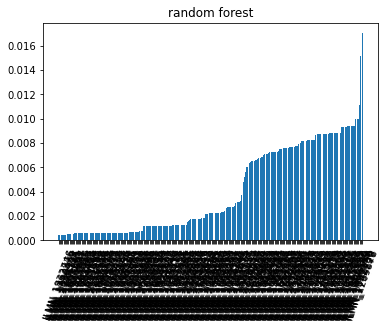

In [933]:
# identify genes and print
selected_features_rf = final_rf.feature_importances_
rf_genes, rf_gene_df = identify_genes(X_df, gene_df, selected_features_rf)
rf_gene_df
print('The number of selected genes is:  '+str(len(rf_genes)))
plot_genes(rf_genes, model='random forest')


In [218]:
# extract coefficients following final training

selected_features_rf = final_rf.feature_importances_
selected_gene_list_rf = list(zip(X_df.columns, selected_features_rf))

selected_gene_codes_rf = []
selected_gene_coefficients_rf = []
for gene in selected_gene_list_rf:
    if gene[1] > 0:
        selected_gene_codes_rf.append(gene[0])
        selected_gene_coefficients_rf.append(gene[1])

# identify common gene codes
selected_gene_rf_df = gene_df[gene_df['Probe_Id'].isin(selected_gene_codes_rf)].iloc[:, np.r_[14, 5]]
selected_gene_codes_common_rf = list(selected_gene_rf_df.iloc[:,1])

# zip features importances with common names

selected_gene_rf_final = list(zip(selected_gene_codes_common_rf, selected_gene_coefficients_rf))
selected_gene_rf_final = sorted(selected_gene_rf_final, key = lambda x: x[1])


In [221]:
#selected_gene_rf_final

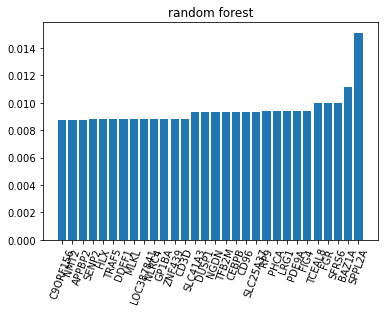

In [222]:
plot_genes(selected_gene_rf_final[-31:-1], model='random forest')

In [935]:
# save the variables

with open('rf_results.pkl', 'wb') as f:
    pickle.dump([scores_rf, best_parameters_rf, mis_classified_rf, selected_features_rf], f)

with open('rf_results_no75.pkl', 'wb') as f:
    pickle.dump([scores_rf_no75, best_parameters_rf_no75, mis_classified_rf_no75], f)

In [972]:
with open('rf_final_model.pkl', 'wb') as f:
    pickle.dump([final_rf, best_n_estimators, best_max_features], f)

In [217]:
# reloading the rf results

#with open('rf_final_model.pkl', 'rb') as f:
#    final_rf, best_n_estimators, best_max_features = pickle.load(f)

### Gene Identification Summary

Using most important features output to identify the genes used by the classifiers

In [351]:
def unzip(features):
    genes = [ i for i, j in features]
    return genes

lr_genes = unzip(selected_gene_lr_nf_final)
svm_genes = unzip(selected_gene_svm_b_final)
rf_genes_all = unzip(selected_gene_rf_final_oob[-31:-1])

intersection_list = []
intersection_list.extend(list(set(lr_genes).intersection(svm_genes)))
intersection_list.extend(list(set(lr_genes).intersection(rf_genes_all)))
intersection_list.extend(list(set(svm_genes).intersection(rf_genes_all)))

intersection_list

['B4GALT5',
 'ATP6V0E2',
 'GSN',
 'PDE9A',
 'FCGBP',
 'NBEAL2',
 'C20ORF100',
 'NMT2',
 'UBE2Q2',
 'ID3',
 'C20ORF100',
 'HS.276860',
 'ATP6V0E2',
 'NBEAL2',
 'ATP6V0E2',
 'C20ORF100',
 'LRRN3',
 'NBEAL2']

### Classifier 4: XGBoost

- Using the XGBoost library rather than sklearn, given more features available
- code credit: https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f
- code credit: https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
- Feature elimination with XGBoost- https://github.com/dhamvi01/Xgboost-Feature-Elimination/blob/master/Xgb-RFE.py

In [975]:
import xgboost as xgb

In [978]:
# nested cross validation function, customised to xgb

def nested_cv_xgb(df, labels, n_repeats):
    
    # configure the cross-validation procedure
    cv_outer = RepeatedKFold(n_splits=3, n_repeats=n_repeats)

    # lists to collect scores from each outer fold
    scores_list = []
    best_parameters_list = []
    mis_classified_list = []

    # create inner loop for hyper parameter optimisation
    for train_ix, test_ix in cv_outer.split(df):

        # split data
        X_train, X_test = df.iloc[train_ix, :], df.iloc[test_ix, :]
        y_train, y_test = labels[train_ix], labels[test_ix]

        # train model
        model, best_max_depth, best_learning_rate, best_colsample_bytree = train_xgb(X_train, y_train)
        
        # model predictions on the test set
        y_pred = model.predict(X_test)
        y_pred_probab = model.predict_proba(X_test)

        # evaluate the model
        scores = score_model(y_pred, y_pred_probab, y_test)
        mis_classified = mis_class_points(X_test, y_pred, y_test)
        
        # add scores to lists
        scores_list.append(scores)
        best_parameters_list.append((best_max_depth,best_learning_rate, best_colsample_bytree, best_f))
        mis_classified_list.append(mis_classified)

    return scores_list, best_parameters_list, mis_classified_list


# function to train xgb model

def train_xgb(X_train, y_train):
      
    param_grid = {"max_depth": [3, 5],
                  "learning_rate": [0.3],
                  "colsample_bytree": [0.01, 0.1, 1]}
    cv_inner = loocv
    cv_res= []

    for param in ParameterGrid(param_grid):

        y_val_classes = []
        y_val_predictions = []
        for train_index, val_index in cv_inner.split(X_train):

            X_train_inner, X_val = X_train.iloc[train_index, :], X_train.iloc[val_index, :]
            y_train_inner, y_val = y_train[train_index], y_train[val_index]                

            # define the rfe proceedure
            xgb_clf = xgb.XGBClassifier(objective="binary:logistic", eval_metric='logloss')       
            xgb_clf.fit(X_train_inner, y_train_inner)

            y_val_pred = xgb_clf.predict(X_val)
            y_val_classes.append(y_val)
            y_val_predictions.append(y_val_pred)

        score = accuracy_score(y_val_classes, y_val_predictions)
        print('Parameters:'+str(param)+'  Score:'+str(score))
        cv_res.append([param['max_depth'], param['learning_rate'], param['colsample_bytree'], score])

    cv_res = np.asarray(cv_res)    
    best_max_depth = int(cv_res[np.argmax(cv_res[:,2])][0])
    best_learning_rate = cv_res[np.argmax(cv_res[:,2])][1]
    best_colsample_bytree = cv_res[np.argmax(cv_res[:,2])][2]
    print('Best max depth:  '+str(best_max_depth)+',   Best colsample:  '+str(best_colsample_bytree))

    # retrain the model with selected hyper parameters
    model = xgb.XGBClassifier(max_depth=best_max_depth,
                                learning_rate=best_learning_rate,
                                colsample_bytree=best_colsample_bytree,
                                objective="binary:logistic",
                                eval_metric='logloss')       

    model.fit(X_train, y_train)

    return model, best_max_depth, best_learning_rate, best_colsample_bytree


In [980]:
import warnings
warnings.filterwarnings("ignore")

scores_xgb_red, best_parameters_xgb_red, mis_classified_xgb_red = nested_cv_xgb(X_df_red, labels, 1)
scores_xgb, best_parameters_xgb, mis_classified_xgb = nested_cv_xgb(X_df, labels, 3)
scores_xgb_no75, best_parameters_xgb_no75, mis_classified_xgb_no75 = nested_cv_xgb(X_df_no75, labels, 3)

Parameters:{'colsample_bytree': 0.01, 'learning_rate': 0.3, 'max_depth': 3}  Score:0.9523809523809523
Parameters:{'colsample_bytree': 0.01, 'learning_rate': 0.3, 'max_depth': 5}  Score:0.9523809523809523
Parameters:{'colsample_bytree': 0.1, 'learning_rate': 0.3, 'max_depth': 3}  Score:0.9523809523809523
Parameters:{'colsample_bytree': 0.1, 'learning_rate': 0.3, 'max_depth': 5}  Score:0.9523809523809523
Parameters:{'colsample_bytree': 1, 'learning_rate': 0.3, 'max_depth': 3}  Score:0.9523809523809523
Parameters:{'colsample_bytree': 1, 'learning_rate': 0.3, 'max_depth': 5}  Score:0.9523809523809523
Best max depth:  3,   Best colsample:  1.0
Parameters:{'colsample_bytree': 0.01, 'learning_rate': 0.3, 'max_depth': 3}  Score:0.9285714285714286
Parameters:{'colsample_bytree': 0.01, 'learning_rate': 0.3, 'max_depth': 5}  Score:0.9285714285714286
Parameters:{'colsample_bytree': 0.1, 'learning_rate': 0.3, 'max_depth': 3}  Score:0.9285714285714286
Parameters:{'colsample_bytree': 0.1, 'learning_r

KeyboardInterrupt: 

In [979]:
# print results
#print('The results for xgb with all test data:')
#print(scores_xgb_red)
#print(best_parameters_xgb_red)
#print(np.mean(np.asarray(scores_xgb_red), axis=0))
#print(mis_classified_xgb_red)

print('The results for random forest with all 63 examples:')
print(scores_xgb)
print(best_parameters_xgb)
print(np.mean(np.asarray(scores_xgb), axis=0))
print(mis_classified_xgb)


print('The results for random forest without patient 75:')
print(scores_xgb_no75)
print(best_parameters_xgb_no75)
print(np.mean(np.asarray(scores_xgb_no75), axis=0))
print(mis_classified_xgb_no75)

Parameters:{'colsample_bytree': 0.01, 'learning_rate': 0.3, 'max_depth': 3}  Score:0.9761904761904762
Parameters:{'colsample_bytree': 0.01, 'learning_rate': 0.3, 'max_depth': 5}  Score:0.9761904761904762
Parameters:{'colsample_bytree': 0.1, 'learning_rate': 0.3, 'max_depth': 3}  Score:0.9761904761904762
Parameters:{'colsample_bytree': 0.1, 'learning_rate': 0.3, 'max_depth': 5}  Score:0.9761904761904762
Parameters:{'colsample_bytree': 1, 'learning_rate': 0.3, 'max_depth': 3}  Score:0.9761904761904762
Parameters:{'colsample_bytree': 1, 'learning_rate': 0.3, 'max_depth': 5}  Score:0.9761904761904762
Best max depth:  3,   Best colsample:  1.0
Parameters:{'colsample_bytree': 0.01, 'learning_rate': 0.3, 'max_depth': 3}  Score:0.9047619047619048
Parameters:{'colsample_bytree': 0.01, 'learning_rate': 0.3, 'max_depth': 5}  Score:0.9047619047619048
Parameters:{'colsample_bytree': 0.1, 'learning_rate': 0.3, 'max_depth': 3}  Score:0.9047619047619048
Parameters:{'colsample_bytree': 0.1, 'learning_r

In [ ]:
# retrain final model

final_xgb, best_max_depth, best_learning_rate, best_colsample_bytree = train_xgb(X_df, labels)

In [8]:
# extract the genes with non-zero coefficients in the model for comparison with other models

# identify genes and print
selected_features_xgb = final_xgb.feature_importances_
xgb_genes = select_genes_fi(X_df, gene_df, selected_features_xgb)
print('The number of selected genes is:  '+str(len(xgb_genes)))
plot_genes(xgb_genes, model='xgboost')

NameError: name 'final_xgb' is not defined

In [ ]:
# save the variables

with open('xgb_results.pkl', 'wb') as f:
    pickle.dump([scores_xgb, best_parameters_xgb, mis_classified_xgb], f)

with open('xgb_results_no75.pkl', 'wb') as f:
    pickle.dump([scores_xgb_no75, best_parameters_xgb_no75, mis_classified_xgb_no75], f)

In [ ]:
with open('xgb_final_model.pkl', 'wb') as f:
    pickle.dump([final_xgb, best_max_depth, best_learning_rate, best_colsample_bytree], f)

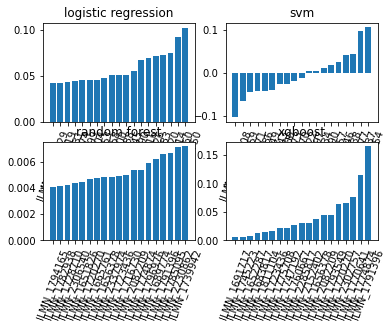

In [397]:
# plot with various axes scales
plt.figure()

# logistic regression
plt.subplot(221)
plot_genes(lr_features, model='logistic regression')

# svm
plt.subplot(222)
plot_genes(svm_features, model='svm')

# random forest
plt.subplot(223)
plot_genes(rf_features, model='random forest')

# xgboost
plt.subplot(224)
plot_genes(xgb_features, model='xgboost')

pyplot.show()


# IGNORE BELOW THIS LINE

In [35]:
# ASSUME THAT NOT GOING TO USE THIS VERSION OF LOGISTIC REGRESSION ANALYSIS, AS USING BAYSIAN SEARCH INSTEAD

from sklearn.model_selection import KFold, RepeatedKFold
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import LeaveOneOut


def nested_cv_lr_gs(df, labels, n_repeats):

    # configure the cross-validation procedure
    cv_outer = RepeatedKFold(n_splits=3, n_repeats=n_repeats)

    # lists to collect scores from each outer fold
    scores_list = []
    best_parameters_list = []
    selected_features_list = []
    mis_classified_list = []

    # create inner loop for hyper parameter optimisation
    for train_ix, test_ix in cv_outer.split(df):

        # split data
        X_train, X_test = df.iloc[train_ix, :], df.iloc[test_ix, :]
        y_train, y_test = labels[train_ix], labels[test_ix]

        # define cross validation approach
        cv_inner = LeaveOneOut()

        # define hyper parameter search space to optimise
        search_space = 20

        # define the model / search
        search = LogisticRegressionCV(Cs=search_space,
                                      penalty='l1',
                                      solver="liblinear",
                                      cv=cv_inner,
                                      scoring='accuracy',
                                      refit=True)

        # fit the model
        search.fit(X_train, y_train)

        # save the best performing value of hyper parameter C
        best_parameter = search.C_
        print(best_parameter)

        # retrain the model with fixed value of C
        model = LogisticRegression(C=best_parameter[0],
                                      penalty='l1',
                                      solver="liblinear")
        model.fit(X_train, y_train)

        # predict on the test set and store the selected features
        y_pred = model.predict(X_test)
        y_pred_probab = model.predict_proba(X_test)
        selected_features = model.coef_
        print(selected_features)
        
        # evaluate the model
        scores = score_model(y_pred, y_pred_probab, y_test)
        mis_classified = mis_class_points(X_test, y_pred, y_test)

        # add scores for this train test split to lists collecting scores for all splits
        scores_list.append(scores)
        best_parameters_list.append(best_parameter)
        selected_features_list.append(selected_features)
        mis_classified_list.append(mis_classified)
    
    return scores_list, best_parameters_list, selected_features_list, mis_classified_list

# run nested cross validation on test data set
# scores_lr, best_parameters_lr, selected_features_lr, mis_classified_lr = nested_cv_lr(X_df_red, labels, n_repeats)

# run nested cross validation on full data set
#scores_lr, best_parameters_lr, selected_features_lr, mis_classified_lr = nested_cv_lr(X_df,  labels, n_repeats)

# run nested cross validation without patient 75
#scores_lr_no75, best_parameters_lr_no75, selected_features_lr_no75, mis_classified_lr_no75 = nested_cv_lr(X_df_no75, 
#                                                                                                       labels_no75,
#                                                                                                       n_repeats)
# print results
#print('The results for logistic regression with all 63 examples:')
#print(scores_lr)
#print(best_parameters_lr)
#print(np.mean(np.asarray(scores_lr), axis=0))
#print(mis_classified_lr)

#print('The results for logistic regression without patient 75:')
#print(scores_lr_no75)
#print(best_parameters_lr_no75)
#print(np.mean(np.asarray(scores_lr_no75), axis=0))
#print(mis_classified_lr_no75)

In [413]:
def unzip(features):
    genes = [ i for i, j in features]
    return genes

lr_genes = unzip(lr_features)
svm_genes = unzip(svm_features)
rf_genes = unzip(rf_features)
xgb_genes = unzip(xgb_features)

In [415]:
# find the common names of the genes

gene_df[gene_df['Probe_Id'].isin(intersection_list)].iloc[:, np.r_[14, 5]]

,Probe_Id,ILMN_Gene
1198,ILMN_1656378,NMT2
10587,ILMN_1720270,CDR2
12973,ILMN_1791396,DGCR6
13839,ILMN_2082209,C20ORF100
29596,ILMN_1723436,PFKFB2
40968,ILMN_1774874,IL1RN


In [421]:
# x. feature selection based on genes in logistic regression with non-zero coefficient

X_gene_set = X_df.loc[:, intersection_list]

# define cross validation approach
cv_inner = LeaveOneOut()

# define hyper parameter search space to optimise
search_space = 20

# define the model / search
search = LogisticRegressionCV(Cs=search_space,
                              penalty='l1',
                              solver="liblinear",
                              cv=cv_inner,
                              scoring='accuracy',
                              refit=True)

# define methods to extract best hyper parameters and features from the model
name = 'lr'

# run nested cross validation
scores_lrgs, best_parameters_lrgs, selected_features_lrgs, mis_classified_lrgs = nested_cv(search,X_gene_set,labels,name,4)

# print results
print('The results for logistic regression with all 63 examples:')
print(scores_lrgs)
print(best_parameters_lrgs)
print(np.mean(np.asarray(scores_lrgs), axis=0))
print(mis_classified_lrgs)

The results for logistic regression with all 63 examples:
[(0.95, 1.0, 0.92, 0.99), (1.0, 1.0, 1.0, 1.0), (1.0, 1.0, 1.0, 1.0), (0.9, 1.0, 0.83, 1.0), (1.0, 1.0, 1.0, 1.0), (0.95, 0.91, 1.0, 1.0), (0.95, 1.0, 0.92, 0.98), (1.0, 1.0, 1.0, 1.0), (1.0, 1.0, 1.0, 1.0), (0.95, 1.0, 0.89, 0.98), (1.0, 1.0, 1.0, 1.0), (0.95, 1.0, 0.91, 1.0)]
[array([4.2813324]), array([0.08858668]), array([0.08858668]), array([0.08858668]), array([0.08858668]), array([1.62377674]), array([0.08858668]), array([0.08858668]), array([0.08858668]), array([0.08858668]), array([0.08858668]), array([0.08858668])]
[0.97083333 0.9925     0.95583333 0.99583333]
[{'Con_165a': 'fp'}, {}, {}, {'Con_040': 'fp'}, {}, {}, {'Con_165a': 'fp'}, {}, {}, {}, {}, {'Con_040': 'fp'}]


### Ensemble model code - maybe reuse

In [72]:
# fit model on dataset
def fit_model(model, X_train, y_train):
    model = model
    model.fit(X_train, y_train)
    return model

In [73]:
# function to generate predictions
def ensemble_predictions(models, X_test):
    # make predictions
    y_preds = [model.predict(X_test) for model in models]
    y_preds = np.array(y_preds)
    y_preds_probab = [model.predict_proba(X_test) for model in models]
    y_preds_probab = np.array(y_preds_probab)
    # average probability predictions across ensemble members
    y_preds_probab_avg = np.average(y_preds_probab, axis=0)
    # determine average class prediction across all models
    y_preds_avg = np.argmax(y_preds_probab_avg, axis=1)
    return y_preds_avg, y_preds_probab_avg


from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import LeaveOneOut

# DOES THIS GIVE THE SAME SET OF PROBABILITIES EVERY ITERATION, I.E. NO STOCHASTIC ELEMETS TO THE LR MODEL?

# define the model
cv = LeaveOneOut()
log_reg_cv = LogisticRegressionCV(Cs=20, penalty='l1', solver="liblinear", cv=cv)

# train multiple models
n_models = 10
models = [fit_model(log_reg_cv, X_train, y_train) for i in range(n_models)]
print(models)

# predict
y_preds_lr, y_preds_probab_lr = ensemble_predictions(models, X_test)

# evaluate
print(score_model(y_preds_lr, y_preds_probab_lr, y_test))
print(mis_class_points(X_test, y_preds_lr, y_test))
plot_auc_cm(X_test, y_preds_lr, y_preds_probab_lr, y_test)

In [463]:
# testing for normailty using Shapiro Wilk

norm_dict = OrderedDict()
for column in column_names: #[0:5]:
    con_series = data_tpose3[column][0:35]
    shapiro_test = stats.shapiro(con_series)
    norm_dict[column] = shapiro_test.pvalue
    
#norm_dict

In [659]:
# x. feature selection based on genes in logistic regression with non-zero coefficient

gene_index = []
gene_index.append([val[0] for val in gene_coefs_sorted])
df_red1 = df.loc[:, gene_index[0]]


# create new features vector, and split

X_reduced = standardise(df_red1)
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_reduced, Y, test_size=0.4, random_state=1)

# SVM classifier

svm_clf=SVC(kernel="linear", random_state=1)
svm_clf.fit(X_red_train, y_train)
svm_clf.score(X_red_test, y_test)


,ILMN_1804148,ILMN_1733276,ILMN_1683817,ILMN_1691402,ILMN_1652650,ILMN_2400183,ILMN_2264011,ILMN_1717197,ILMN_1747192,ILMN_1659800,...,ILMN_2082209,ILMN_1786433,ILMN_2087989,ILMN_1775744,ILMN_1762071,ILMN_1677906,ILMN_1789642,ILMN_1660629,ILMN_1669281,ILMN_2363489
Con_001,9.2482,8.2974,8.9179,9.1453,8.2035,8.3242,10.8239,9.3468,7.9025,7.923,...,9.3405,7.7609,7.5719,8.7739,7.4165,10.3523,7.4165,7.8414,7.5438,8.0306
Con_017,9.1308,8.1693,9.1417,8.8694,8.007,8.1921,11.0308,9.5891,7.8209,7.293,...,9.1884,7.8326,7.7396,8.69,7.4233,10.4527,7.6051,7.9381,7.5823,8.0894
Con_021,9.0007,8.1167,9.154,8.2019,7.909,8.195,10.6904,9.6435,7.8912,7.2871,...,8.6219,7.7485,7.8544,8.1969,7.3221,9.2921,7.6426,8.1409,8.0705,8.2665
Con_022b,9.1283,7.9644,8.997,7.9236,7.9545,8.2893,11.2486,8.8398,7.8079,7.3722,...,9.6519,7.8024,7.8428,8.4029,7.4075,9.0954,7.6117,8.1839,8.0715,8.305
Con_028,9.3336,8.2082,9.0675,8.9659,7.8979,8.2616,11.1644,9.6249,7.9401,7.5242,...,9.61,8.0068,7.9339,8.8487,7.4443,10.3253,7.6561,7.9994,7.5062,8.1178


In [525]:
# to view entire dataframe

#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    print(etc...)

In [ ]:
def std_split(examples, labels, split):
    imputer = SimpleImputer(strategy='median')
    examples_imputed = imputer.fit_transform(examples)
    scaler = StandardScaler()
    examples_scaled = scaler.fit_transform(examples_imputed)
    X_train, X_test, y_train, y_test = train_test_split(examples_scaled, labels, test_size=split, random_state=42)
    return X_train, X_test, y_train, y_test

Accuracy:  0.92
Recall:  0.94
Precision:  0.94
AUC:   0.98


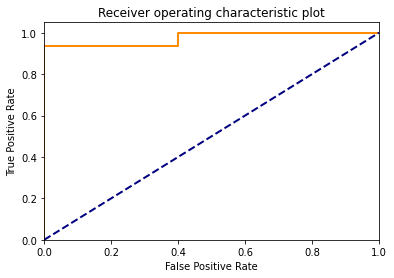

Patient Con_087a has been classified as  1 and should be  0
Patient Inf_149 has been classified as  0 and should be  1


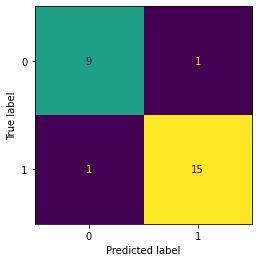

In [113]:
# Random Forest with Recursive Feature Elimination - NOT USED

from sklearn.ensemble import RandomForestClassifier

# train
rf_clf = RandomForestClassifier(random_state=1)
rf_selector = RFE(rf_clf, n_features_to_select=10, step=1)
rf_selector = rf_selector.fit(X_train_red, y_train)

# predict
y_pred_rf = rf_selector.predict(X_test_red)
y_pred_probab_rf = rf_selector.predict_proba(X_test_red)

# evaluate
model_analysis(rf_selector, X_test_red, y_pred_rf, y_pred_probab_rf, y_test)

Optimum L1 regularisation parameter: [1.]
(0.95, 0.89, 1.0, 1.0)
{'Inf_149': 'fn'}


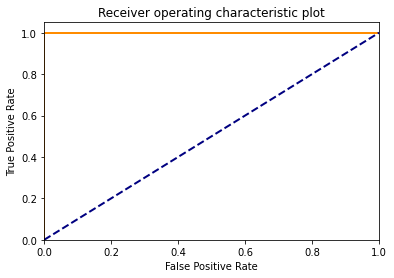

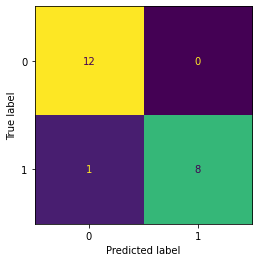

In [47]:
# initial logistic regression model

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import LeaveOneOut

# train
loocv = LeaveOneOut()
log_reg_cv = LogisticRegressionCV(Cs=5, penalty='l1', solver="liblinear", cv=loocv)
log_reg_cv.fit(X_train, y_train)
print('Optimum L1 regularisation parameter: '+str(log_reg_cv.C_))

# predict
y_pred_lr = log_reg_cv.predict(X_test)
y_pred_probab_lr = log_reg_cv.predict_proba(X_test)

# evaluate
print(score_model(y_pred_lr, y_pred_probab_lr, y_test))
print(mis_class_points(X_test, y_pred_lr, y_test))
plot_auc_cm(X_test, y_pred_lr, y_pred_probab_lr, y_test)

In [164]:
# random forest using a restricted set of features to reduce run time. Randomized search optimising the 
# balance between number of features used and number of estimators

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import LeaveOneOut
import time

start_time = time.time()
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
max_features = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features
               }
print(random_grid)

rf_clf_2 = RandomForestClassifier(random_state=1)
loocv = LeaveOneOut()
rf_random = RandomizedSearchCV(estimator = rf_clf_2,
                               param_distributions = random_grid,
                               n_iter = 30,
                               refit=True,
                               cv = loocv)
rf_random.fit(X_train, y_train)

end_time = time.time()
print(f"The execution time is: {end_time-start_time}")

# capture feature importances
f_importance = rf_random.best_estimator_.feature_importances_

# save the model given running time
dump(rf_random, 'rf_random.joblib')


{'n_estimators': [100, 2000], 'max_features': [100, 1000]}
The execution time is: 265.78545570373535


RandomForestClassifier(max_features=1000, n_estimators=2000, random_state=1)

{'n_estimators': 1700, 'max_features': 800}
Accuracy:  0.96
Recall:  0.92
Precision:  1.0
AUC:   0.99


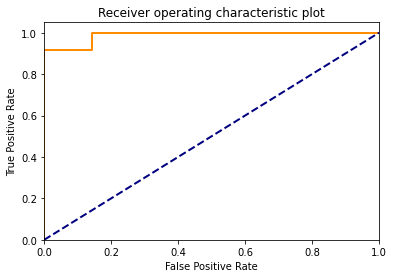

Patient Inf075 has been classified as  0 and should be  1


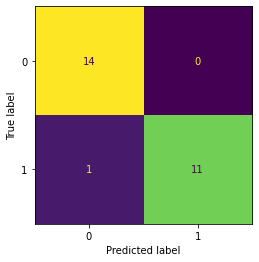

In [245]:
# load the saved model

rf_random = load('rf_random.joblib') 

# best parameters

print(rf_random.best_params_)

# predict
y_pred_rf2 = rf_random.predict(X_test)
y_pred_probab_rf2 = rf_random.predict_proba(X_test)

# evaluate
model_analysis(X_test, y_pred_rf2, y_pred_probab_rf2, y_test)

/Users/Ed/Anaconda/anaconda3/envs/keras_env/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/Ed/Anaconda/anaconda3/envs/keras_env/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Best Accuracy: 0.952
Best Parameters: [0.389256965562435]


<AxesSubplot:xlabel='C', ylabel='Number of samples'>

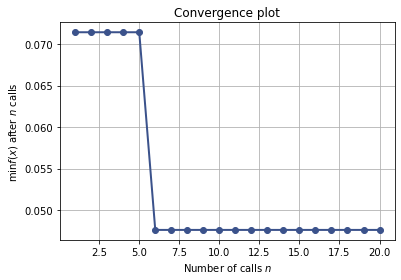

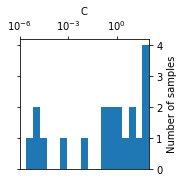

In [349]:
# Baysian search - single train / test evaluation - in case mess up

from skopt.space import Real, 
from skopt.utils import use_named_args
from skopt import gp_minimize
from sklearn.model_selection import cross_val_score
from skopt.plots import plot_convergence, plot_evaluations

# define hyper paramaeter search space
hyper_p_c = Real(low=1e-6, high=100.0, prior='log-uniform', name='C')
search_space = [hyper_p_c]

# define the objective function to optimise over the hyper-parameter search space. Here we want to minimise 1- the 
# accuracy score - balancing recall and precision in the model.
@use_named_args(search_space)
def evaluate_model(**params):
    model = LogisticRegression(penalty='l1', solver="liblinear")
    model.set_params(**params)
    # define test harness
    cv = LeaveOneOut()
    # perform the search across the space of values of C
    result = cross_val_score(model, X_train, y_train, cv=cv, n_jobs=-1, scoring='accuracy')
    # calculate the mean of the scores
    estimate = np.mean(result)
    # convert from a maximizing score to a minimizing score
    return 1.0 - estimate

# perform optimization
result = gp_minimize(evaluate_model, search_space, n_calls=20)

# summarizing finding:
print('Best Accuracy: %.3f' % (1.0 - result.fun))
print('Best Parameters: %s' % (result.x))
plot_convergence(result)
plot_evaluations(result)

In [191]:
# Initial feature selection using univariate method - not needed since a single train / test split

num_features = 500
fs=SelectKBest(mutual_info_classif, k=num_features).fit(X_train, y_train)
X_train_red = fs.transform(X_train)
X_test_red = fs.transform(X_test)

# Identify columns selected

gene_codes = df.columns
kbest_genes = fs.get_support()
gene_list = list(zip(gene_codes, kbest_genes))

gene_codes_reduced = []
for gene in gene_list:
    if gene[1] == True:
        gene_codes_reduced.append(gene[0])
        
print('The number of features selected:  '+str(len(gene_codes_reduced)))

# re-create DataFrame for X_train_red and X_test_red

X_train_red = pd.DataFrame(X_train_red, columns=gene_codes_reduced, index=X_train.index)
X_test_red = pd.DataFrame(X_test_red, columns=gene_codes_reduced, index=X_test.index)

X_test_red

The number of features selected:  500


,ILMN_1700306,ILMN_1778764,ILMN_1685312,ILMN_1911605,ILMN_2390859,ILMN_1663541,ILMN_2256359,ILMN_1656378,ILMN_1768480,ILMN_1739263,...,ILMN_1751789,ILMN_1773650,ILMN_2261784,ILMN_1660579,ILMN_1714599,ILMN_2258816,ILMN_1728298,ILMN_1739942,ILMN_1663685,ILMN_1800626
Con_062,0.833159,0.530819,-0.883253,1.880315,-0.885841,0.587572,1.476044,1.337178,1.213141,0.865492,...,0.507167,1.415266,1.365689,1.033457,0.862104,0.975359,1.161059,1.740120,1.040935,1.440165
Inf_203,-1.138958,-1.431796,0.977688,0.310028,0.630259,-1.190553,-0.966087,-1.187578,-1.343629,-1.239142,...,-0.495373,-1.145397,-1.127541,-0.778819,-0.907497,-1.517978,-0.965967,-1.269618,-1.095984,-1.391392
Inf_159a,-1.826881,-1.623699,1.951862,-2.238301,0.959611,-2.610249,-1.494750,-1.693020,-1.401972,-1.195336,...,-0.784046,-0.891666,-2.419558,0.500354,-1.288575,-1.453390,-1.962339,-1.483861,-2.060785,-2.535981
Con_042,1.155919,0.969799,-0.544900,1.331429,-1.194380,0.982043,1.305330,1.154954,0.251521,1.056739,...,1.704550,0.502944,0.898845,1.613403,1.939928,0.964149,0.813502,0.973268,1.594495,0.409223
Con_028,0.847183,0.319325,-0.335310,1.038756,-1.015924,1.347279,1.072938,1.139384,1.278004,0.973969,...,1.423061,0.209977,0.725178,1.757362,1.253603,0.653349,0.745570,0.657743,1.654465,0.085419
Inf_119,-0.158531,-0.721352,0.396222,-0.571934,-0.093776,-1.171730,-0.720111,-0.270114,-0.722111,0.214286,...,1.149181,-0.429602,-0.099994,-0.919806,-0.031674,-0.128521,-0.347170,-0.145385,-0.670788,0.486191
Con_022b,1.013476,0.601984,-0.978493,0.106044,-0.345849,1.362898,0.770793,0.846441,1.260501,0.594127,...,1.158479,0.967786,1.246382,0.554738,0.931362,0.944799,0.871833,0.552016,0.481969,0.818714
Con_069,0.651738,-0.365131,0.024660,0.440598,-1.045217,0.760178,1.687877,0.650666,0.845240,0.913679,...,1.070989,0.357893,1.122800,1.597408,0.810802,0.462653,0.307964,0.674279,1.147800,-0.228764
Inf_111,-1.191187,-1.732045,1.610690,-1.311994,0.971560,-0.560199,-0.917626,-0.961816,-0.279395,-1.724002,...,-1.369847,-1.320309,-1.874736,-0.854911,-1.316952,-1.369318,-1.324462,-1.359635,-1.552989,-1.484595
Inf_152,-1.888164,-0.403512,1.230356,-0.460088,0.187782,-0.766045,-0.695147,-1.533285,-0.363477,-0.502975,...,-0.062573,-2.133933,-0.519198,-0.829318,-0.616197,-1.791146,-1.860016,-1.382372,-0.763195,-0.961758


In [299]:
import xgboost as xgb

# pre-processing to xgb data format

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    # Parameters that we are going to tune.
    'max_depth': max_depth,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': colsample_bytree,
    'eval_metric': 'auc',
    # Other parameters
    'objective':'binary:logistic',
}

gridsearch_params = [
    (max_depth, colsample_bytree)
    for max_depth in [3] #, 5, 7]
    for colsample_bytree in [0.01] #, 0.1, 1]
]

# total number of boosting rounds, but limited by the early stopping rounds
num_boost_round = 100

# Define initial best params and MAE
max_auc = 0
best_params = None
for max_depth, colsample_bytree in gridsearch_params:
    print("CV with max_depth={}, colsample_bytree={}".format(max_depth, colsample_bytree))
    
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        nfold=5,
        metrics={'auc'},
        early_stopping_rounds=10
        )
    
    print(cv_results)
    
    # Update best results
    mean_auc = cv_results['test-auc-mean'].max()
    boost_rounds = cv_results['test-auc-mean'].argmax()
    print("\tAUC {} for {} rounds".format(mean_auc, boost_rounds))
    if mean_auc > max_auc:
        max_auc = mean_auc
        best_params = (max_depth, colsample_bytree)

print(max_auc)
print(best_params)

# for training on the test set later
#xgb_clf = xgb.train(
 #   params,
  #  dtrain,
   # num_boost_round=num_boost_round,
   # evals=[(dtest, "Test")],
   # early_stopping_rounds=10
#)

CV with max_depth=3, colsample_bytree=0.01
   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0         0.96500       0.017795       0.950000      0.100000
1         0.99852       0.001209       0.950000      0.100000
2         1.00000       0.000000       0.950000      0.100000
3         1.00000       0.000000       0.983333      0.033333
4         1.00000       0.000000       0.991667      0.016667
5         1.00000       0.000000       1.000000      0.000000
	AUC 1.0 for 5 rounds
1.0
(3, 0.01)


In [308]:
# training final model with best hyper parameters

best_params = {
    'max_depth': 3,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 0.1,
    'max_depth':2,
    'eval_metric': 'auc',
    'objective':'binary:logistic',
}

# for training on the test set later
xgb_clf = xgb.train(
    best_params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
    )

# train again with num boost rounds set
num_boost_round = xgb_clf.best_iteration + 1

xgb_clf = xgb.train(
    best_params,
    dtrain,
    num_boost_round=5,
    evals=[(dtest, "Test")]
    )


y_pred_probab_xgb = xgb_clf.predict(dtest)
y_pred_xgb = [round(value) for value in y_pred_probab_xgb]
print(y_pred_probab_xgb)
print(y_pred_xgb)
#plt.figure(figsize=(20,15))
#xgb.plot_importance(xgb_clf, ax=plt.gca())


[0]	Test-auc:1.00000
[0]	Test-auc:1.00000
[1]	Test-auc:1.00000
[2]	Test-auc:1.00000
[3]	Test-auc:1.00000
[4]	Test-auc:1.00000
[0.14142823 0.84146446 0.84146446 0.14142823 0.14142823 0.75781757
 0.14142823 0.14142823 0.84146446 0.84146446 0.14142823 0.14142823
 0.63659555 0.84146446 0.74819934 0.84146446 0.74819934 0.14142823
 0.34767017 0.7356338  0.21839157 0.14142823 0.84146446 0.74819934
 0.84146446 0.14142823]
[0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0]


In [311]:
accuracy = round(accuracy_score(y_test, y_pred_xgb),2)
recall = round(recall_score(y_test, y_pred_xgb),2)
precision = round(precision_score(y_test, y_pred_xgb),2) 
auc = round(roc_auc_score(y_test, y_pred_probab_xgb),2)
print(accuracy, recall, precision, auc)

1.0 1.0 1.0 1.0


In [ ]:
def nested_cv_svm_baysian(df, labels, n_repeats):
    '''dataframe, labels, integer -> lists of scores, best hyper parameters, selected features, mis-classified points
    
    This function implements a nested cross validation. The outer loop is a repeated k fold, that creates multiple
    alternative train / test splits. The inner loop performs hyper parameter optimisation and feature selection using
    recursive feature elimination using an SVM model.
    '''
    
    # configure the cross-validation procedure
    cv_outer = RepeatedKFold(n_splits=3, n_repeats=n_repeats)

    # lists to collect scores from each outer fold
    scores_list = []
    best_parameters_list = []
    selected_features_list = []
    mis_classified_list = []

    # create inner loop for hyper parameter optimisation
    for train_ix, test_ix in cv_outer.split(df):

        # split data
        X_train, X_test = df.iloc[train_ix, :], df.iloc[test_ix, :]
        y_train, y_test = labels[train_ix], labels[test_ix]

        # define pipeline and perform search
        hyper_p_c = Real(1e-6, 100.0, 'log-uniform', name='C')
        search_space_svm = [hyper_p_c] 
        
        @use_named_args(search_space_svm)
        def evaluate_model(**params):
            cv_inner = LeaveOneOut()
            y_val_classes = []
            y_val_predictions = []
            for train_index, val_index in cv_inner.split(X_train):

                X_train_inner, X_val = X_train.iloc[train_index, :], X_train.iloc[val_index, :]
                y_train_inner, y_val = y_train[train_index], y_train[val_index]                

                # define the rfe proceedure
                svc = SVC(kernel="linear", probability=True)  
                svc.set_params(**params)
                rfe = RFE(estimator=svc, n_features_to_select=20, step=10)
                rfe.fit(X_train_inner, y_train_inner)
                
                y_val_pred = rfe.predict(X_val)
                y_val_classes.append(y_val)
                y_val_predictions.append(y_val_pred)
                
            score = roc_auc_score(y_val_classes, y_val_predictions)
            return 1.0 - score

        # perform optimization
        result = gp_minimize(evaluate_model, search_space_svm, n_calls=10)
        plot_convergence(result)
        #plot_evaluations(result)
        best_C = result.x[0]
        #best_f = int(cv_res[np.argmax(cv_res[:,2])][1])

        print('Best score: %.3f' % (1.0 - result.fun))
        print('Best C: %s' % (best_C))
           
        # retrain the model with selected hyper parameters
        clf = SVC(kernel="linear", C=best_C, probability=True)        
        feature_elim = RFE(estimator=clf, n_features_to_select=20, step=10)
        clf_2 = SVC(kernel="linear", C=best_C, probability=True) 
        model = Pipeline(steps=[('feature_elim', feature_elim),
                               ('clf_2', clf_2)])
        model.fit(X_train, y_train)
        
        # model predictions on the test set
        y_pred = model.predict(X_test)
        y_pred_probab = model.predict_proba(X_test)

        # evaluate the model
        scores = score_model(y_pred, y_pred_probab, y_test)
        mis_classified = mis_class_points(X_test, y_pred, y_test)
        
        # add scores to lists
        scores_list.append(scores)
        best_parameters_list.append(best_C)
        selected_features_list.append(selected_features)
        mis_classified_list.append(mis_classified)

    return scores_list, best_parameters_list, selected_features_list, mis_classified_list


# support vector machine nested cross validation. The inner loop is a manual grid search over hyper parameters
# C and the number of features to select in the RFE

def nested_cv_svm(df, labels, n_repeats):
    '''dataframe, labels, integer -> lists of scores, best hyper parameters, selected features, mis-classified points
    
    This function implements a nested cross validation. The outer loop is a repeated k fold, that creates multiple
    alternative train / test splits. The inner loop performs hyper parameter optimisation and feature selection using
    recursive feature elimination using an SVM model.
    '''
    
    # configure the cross-validation procedure
    cv_outer = RepeatedKFold(n_splits=3, n_repeats=n_repeats)

    # lists to collect scores from each outer fold
    scores_list = []
    best_parameters_list = []
    selected_features_list = []
    mis_classified_list = []

    # create inner loop for hyper parameter optimisation
    for train_ix, test_ix in cv_outer.split(df):

        # split data
        X_train, X_test = df.iloc[train_ix, :], df.iloc[test_ix, :]
        y_train, y_test = labels[train_ix], labels[test_ix]

        # define pipeline and perform search
        param_grid = {'C': [0.001, 0.01, 0.1, 1.0, 10, 100], 'f': [5, 10, 20]}
        cv_inner = loocv

        cv_res= []
       
        for param in ParameterGrid(param_grid):

            y_val_classes = []
            y_val_predictions = []
            for train_index, val_index in cv_inner.split(X_train):

                X_train_inner, X_val = X_train.iloc[train_index, :], X_train.iloc[val_index, :]
                y_train_inner, y_val = y_train[train_index], y_train[val_index]                

                # define the rfe proceedure
                svc = SVC(kernel="linear", C=param['C'], probability=True)        
                rfe = RFE(estimator=svc, n_features_to_select=param['f'], step=10)
                rfe.fit(X_train_inner, y_train_inner)
                
                y_val_pred = rfe.predict(X_val)
                y_val_classes.append(y_val)
                y_val_predictions.append(y_val_pred)
                
            
            score = accuracy_score(y_val_classes, y_val_predictions)
            print('Parameters:'+str(param)+'  Score:'+str(score))
            cv_res.append([param['C'], param['f'], score])
        
        cv_res = np.asarray(cv_res)    
        best_C = cv_res[np.argmax(cv_res[:,2])][0]
        best_f = int(cv_res[np.argmax(cv_res[:,2])][1])
        print('Best C:  '+str(best_C)+',   Best f:  '+str(best_f))

        # retrain the model with selected hyper parameters
        clf = SVC(kernel="linear", C=best_C, probability=True)        
        feature_elim = RFE(estimator=clf, n_features_to_select=best_f, step=10)
        clf_2 = SVC(kernel="linear", C=best_C, probability=True) 
        model = Pipeline(steps=[('feature_elim', feature_elim),
                               ('clf_2', clf_2)])
        model.fit(X_train, y_train)
        
        # model predictions on the test set
        y_pred = model.predict(X_test)
        y_pred_probab = model.predict_proba(X_test)

        # evaluate the model
        scores = score_model(y_pred, y_pred_probab, y_test)
        mis_classified = mis_class_points(X_test, y_pred, y_test)
        
        # extract coefficients based on model type                        
        selected_features = model.named_steps['clf_2'].coef_
        
        # add scores to lists
        scores_list.append(scores)
        best_parameters_list.append((best_C, best_f))
        selected_features_list.append(selected_features)
        mis_classified_list.append(mis_classified)

    return scores_list, best_parameters_list, selected_features_list, mis_classified_list


# IF NEEDED, MAY NEED TO REINSTATE THE SELECT K BEST APPROACH TO INITIALLY REDUCE THE NUMBER OF FEATURES
#fs=SelectKBest(mutual_info_classif, k=500)
#rfe = RFE(estimator=SVC(kernel="linear", probability=True, C=1.0), n_features_to_select=20, step=20)
#model = SVC(kernel="linear", probability=True, C=1.0)
#svm_pipeline = Pipeline(steps=[('kbest', fs), ('rfe', rfe),('model', model)])

In [248]:
# random forest using the nested CV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import LeaveOneOut

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]  # originally this was num=20
max_features = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features
               }

rf_clf = RandomForestClassifier()
loocv = LeaveOneOut()

rf_search = RandomizedSearchCV(estimator = rf_clf,
                               param_distributions = random_grid,
                               n_iter = 5,  # need to increase to say 30
                               refit=True,
                               cv = loocv)
name = 'rf'

# run nested cross validation
scores_rf, best_parameters_rf, selected_features_rf, mis_classified_rf = nested_cv(rf_search, X_df, labels, name)
scores_rf_no75, best_parameters_rf_no75, selected_features_rf_no75, mis_classified_rf_no75 = nested_cv(rf_search,
                                                                                                       df_no75, 
                                                                                                       labels_no75,
                                                                                                       name)


print('The results for random forest with all 63 examples:')
print(scores_list_rf)
print(best_parameters_list_rf)
print(np.mean(np.asarray(scores_list_rf), axis=0))
print(mis_classified_list_rf)

print('The results for random forest without patient 75:')
print(scores_rf_no75)
print(best_parameters_rf_no75)
print(np.mean(np.asarray(scores_rf_no75), axis=0))
print(mis_classified_rf_no75)


The results for random forest with all 63 examples:
[(0.9, 0.8, 1.0, 1.0), (1.0, 1.0, 1.0, 1.0), (0.95, 1.0, 0.9, 1.0)]
[{'n_estimators': 1155, 'max_features': 300}, {'n_estimators': 522, 'max_features': 200}, {'n_estimators': 733, 'max_features': 500}]
[0.95       0.93333333 0.96666667 1.        ]
[{'Inf075': 'fn', 'Inf_149': 'fn'}, {}, {'Con_165a': 'fp'}]
The results for random forest without patient 75:
[(1.0, 1.0, 1.0, 1.0), (0.95, 1.0, 0.91, 1.0), (0.95, 0.89, 1.0, 0.98)]
[{'n_estimators': 1155, 'max_features': 700}, {'n_estimators': 2000, 'max_features': 700}, {'n_estimators': 100, 'max_features': 300}]
[0.96666667 0.96333333 0.97       0.99333333]
[{}, {'Con_165a': 'fp'}, {'Inf_149': 'fn'}]
